# Choosing an optimal location of an airline hub

Date: *23/04/2024* <br>


**Course**: Managerial Decision Making & Modeling

**Prepared by**
- *Nilufar Iangiboeva, 902431@stud.unive.it*
- *Ekaterina Voronkova, 903409@stud.unive.it*
- *Yosr Bouhoula, 903432@stud.unive.it*

# 1 - Abstract

This project aim to find the optimal location of the potential aiport hub in the United States in accordance with demand of flight on distance and passenger traffic to different air destinations. As a company we want to choose the best option to invest money in opening a hub. The choice of the most profitable hub is based on the assumption that the greater the distance an airplane goes from the point of departure (hub) to the final destination, the higher the cost of the flight per passenger and the more revenue the company receives. The study was carried out in two stages: at the first stage, data was collected from United Nations Office for the Coordination of Humanitarian Affairs and United States Department of Transportation databases. At the same stage, preliminary data processing and datasets merging were carried out. At the second stage of the research, using the Pyomo Python library, a mathematical model was developed to determine the optimal potential airline hub, maximizing the profit from flights that go from the origin to the destination through the hub. As a result of the research, with a given list of constraints we got a list of airport hubs where the profits from flights are the highest.

# 2 - Acronyms and definitions

*   Airline hub (hub airport) - central airport for an airline's operations, concentrating a number of flights to facilitate smooth connections between destinations.
*   IATA code - a three-letter airport code designating an airport, defined by the International Air Transport Association (IATA).
*   Gallon -  a unit of measurement for volume, commonly used in the United States for liquids such as gasoline. A gallon is equivalent to 3.78541 liters.
* Capacity_asm - Capacity ASM (Available Seat Miles) in air flights refers to the total number of seats available for sale multiplied by the number of miles those seats are flown. It is a measure used by airlines to assess their ability to provide passenger capacity over a given period. Capacity ASM indicates the airline's potential to generate revenue from passenger transportation services and is a key metric in evaluating operational efficiency and revenue management strategies.
* Capacity_tsi - Capacity TSI (Transportation Service Index) measures the volume of freight and passenger transportation services moved monthly by the for-hire transportation sector.



# 3 - Problem statement
 We own a company located in the United States, and we need to decide where to locate airport hubs in order to provide them with our services. Since our company has a limited budget, it is possible to open no more than 2 hubs in the US. Moreover, hubs should be selected to provide the greatest profitability.



# 4 - System

## 4.1 - Agents/DMs

Agents are senior management of our company and US and foreign airlines. The agents' goal is to: increase passenger and cargo flows on domestic and international long-distance flights to ensure the greatest profitability.

## 4.2 - Entities

Entities are the airports. Airports are divided into two groups. The first group indicates the airport of the origin, the second one - airport of the final destination. There is also a small group of potential hub airports that connect departure and destination airports. All the airports of the origin are located in the USA.

## 4.3 - Relationships among elements

*   The demand from the origin to the destination can be served if there is a hub that serves airport of the origin and airport of the destination. Besides, the demand that originates from airport of the origin to any other destination can be served if an airport of the origin is assigned to a potential hub.
*  Distance between departure point, hub and arrival point influences the income received by the DMs.

## 4.4 - Other constituents of the system

*   Internal uncertainties and disturbances: the budget for implementing the project by the DMs' is always limited.
*   External disturbances: demand is a fluctuating variable, and it can be either much less than the capacity of aircraft and airports, or vice versa.




## 4.5 - Assumptions




1.   We assume that the average cruising speed of an airplane in km/h is 917.* Airspeed depends on the aerodynamic qualities of the aircraft, its flight weight and air density. Since the datasets do not contain information about charateristics that influence the cruising speed, average speed was taken into consideration.
2.   We assume that the average fuel consumption of an airplane in gallons per hours is 3600.* In addition to route length, in-flight fuel consumption is affected by factors such as aircraft size, selected cruising speed, load, wind speed and flight altitude. Since the datasets do not contain information about charateristics that influence the fuel consumption, average consumption was taken into consideration.
3. We assume that the airline only has two operating costs: fuel consumption cost and transportation service cost (the index TSI).* Fuel consumption cost is assumed to be constant as for every new mile of flight, an airplane consumes the same amount of fuel.
4. We assume that the demand for flights depends on the flight length.* Hence, the longer the flight is, the more passengers there are. We suppose:


  *   if the flight distance is less than 800 km, the demand for this flight is 80 passengers,
  *   if the flight distance is between 800 and 2500 km, the demand for this flight is 150 passengers,
  *   if the flight distance is more than 2500 km, the demand for this flight is 220 passengers.



# 5 - Data


**Assumption**: Unit transportation cost data can be purchased from www.site.com. However, the data used in this project is artificially generated according to the following rule:  

*unit transportation cost_{w,c} = 0.5 x great circle distance between warehouse w and customer c*


**Assumption**: The transportation costs are assumed as follows:

*unit transportation cost_{w,c} = alpha x distance between warehouse w and customer c*

*fixed transportation cost_{w,c} = beta*

--------------
For compiling the project four dataset were used.        
                   
1. **Dataset with the list of airports in the United States.** The name of the file with the dataset is US-AIRPORTS.CSV.

> **Source of the dataset:** https://data.humdata.org/dataset/ourairports-usa. The Source is provided by the United Nations Office for the Coordination of Humanitarian Affairs (OCHA). Year of the data is 2023.

> **Description of the dataset:** the dataset contains 24 columns with 30936 observations. Each observation represents a particular airport with its IATA code and exact location in the United States (region, municipality, latitude and longitude).

> **Assumptions:** the dataset does not contain assumptions since it does not contain computationally derived variables or binary variables.     

> **Usage of the dataset:** the dataset is used to construct a map showing the location of all airports in the United States and identifying the states that have the largest number of airfields.


2. **Dataset with the U.S. international air passenger and freight statistics.** The dataset was created by combining two datasets. The names of the files with the datasets are INTERNATIONAL_REPORT_PASSENGERS_20240302.CSV and INTERNATIONAL_REPORT_FREIGHT_20240302.CSV.                           

> **Source of the dataset:** https://www.transportation.gov/policy/aviation-policy/us-international-air-passenger-and-freight-statistics-report. The Source is provided by the United States Department of Transportation (DOT). Year of the data is 2023.

> **Description of the dataset:** the dataset if organised in 16 columns and represents the air carrier that operated the passenger or cargo flight reported. Columns of the dataset to be explained:
* Year - Data Year
* Month - Data Month
* usg_apt_id - US Gateway Airport ID - assigned by US DOT to identify an airport
* usg_apt - US Gateway Airport Code - usually assigned by IATA, but in absense of IATA designation, may show FAA-assigned code
* usg_wac - US Gateway World Area Code - assigned by US DOT to represent a geographic territory
* fg_apt_id - Foreign Gateway Airport ID - assigned by US DOT to identify an airport
* fg_apt - Foreign Gateway Airport Code - usually assigned by IATA, but in absense of IATA designation, may show FAA-assigned code
* fg_wac - Foreign Gateway World Area Code - assigned by US DOT to represent a geographic territory
* airlineid - Airline ID - assigned by US DOT to identify an air carrier
* carrier - IATA-assigned air carrier code. If carrier has no IATA code, ICAO- or FAA-assigned code may be used
* carriergroup - Carrier Group Code - 1 denotes US domestic air carriers, 0 denotes foreign air carriers
* type - Defines the type of flight operated
* Scheduled - Number of passengers carried by scheduled service operations
* Charter - Number of passengers carried by charter operations
* Total - Total passengers carried by scheduled service and charter operations

> **Assumptions:** the dataset does not contain assumptions since it does not contain computationally derived variables or binary variables.

> **Usage of the dataset:** the dataset is used to get the information about the busiest months for the US aviation sector in terms of the number of passengers and the volume of air freight and subsequently be combined with the first dataset to get the most popular air destinations, as well as airports from which the largest number of air flights take place.

3. **Dataset with the airline fuel consumption by the US carriers and its' cost**. The name of the file with the dataset is FUEL_20240306_143446.

> **Source of the dataset:** https://transtats.bts.gov/fuel.asp. The Source is provided by the Bureau of Transportation Statistics of the United States Department of Transportation (DOT). Data time period is 2000-2023.

> **Description of the dataset:** the dataset is organised in 11 columns and contains data about the consumption of airline fuel in million gallons, cost of fuel per gallon in dollars and the overall cost spent on airline fuel for domestic, international and overall number of flights.

> **Assumptions:** the cost of airline fuel spent by the U.S. carriers is assumed as follows:
*Cost_{c, p} = consumption of the airline fuel c x cost of fuel per gallon p*

> **Usage of the dataset:** the dataset is used to find the average fuel consumption per km for domestic and international flights for each month, as well as to calculate the cost of fuel for each flight presented in the dataset.

4. **Dataset with Transportation Services Index (TSI)**. The name of the file with the dataset is TRANSPORTATION_SERVICES_INDEX_AND_SEASONALLY_ADJUSTED_TRANSPORTATION_DATA_20240306.

> **Source of the dataset:** https://data.bts.gov/stories/s/Transportation-as-an-Economic-Indicator-Seasonally/j32x-7fku. The Source is provided by the Bureau of Transportation Statistics of the United States Department of Transportation (DOT). Year of the data is 2023.

> **Description of the dataset:** the dataset is organised in 79 columns and calculates the Transportation Services Index (TSI) and Available Seat Miles (ASM). TSI  measures the volume of freight and passenger transportation services moved monthly by the for-hire transportation sector in the United States. Changes in the TSI reflect changes in the demand for goods and services. For example, in periods of economic expansion the demand for goods and services typically increases, which in turn increases the demand for transportation reflected by an increase in the TSI. ASMs are a measure of the capacity of air passenger transportation. An available seat-mile is equal to one aircraft seat carried one mile.

> **Assumptions:** combined TSI is assumed as follows:
*combined TSI_{f, p} = (freight index f + passenger index p)/2*

> **Usage of the dataset:**  the dataset is used to get information about the capacity and apply it to for each flight and for each month.










        
          



### Preparing working environment



In [ ]:
working_in_colab = True
if working_in_colab:
    !pip install -q pyomo
    !apt-get install -y -qq coinor-cbc
    from google.colab import drive
    drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
if working_in_colab:
    input_directory = "/content/drive/MyDrive/Colab Notebooks/Input/"
    cbc_path = "/usr/bin/cbc"

In [ ]:
import pyomo.environ as pyo
!pip install pandas

import pandas as pd
from pyomo.environ import *

!pip install basemap
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

import networkx as nx

### Merging and cleaning data

In [ ]:
us_airports=pd.read_csv('/content/drive/MyDrive/MDM&M/us-airports (3).csv')
us_airports.drop(0, inplace=True)
us_airports.isna().sum()

us_airports_data=us_airports[['id', 'ident', 'type', 'name', 'latitude_deg', 'longitude_deg',
'elevation_ft','country_name', 'iso_country','region_name', 'iso_region', 'local_region', 'municipality',
 'gps_code', 'iata_code', 'local_code']].copy()

us_airports_data.info()
unique_iata_codes = us_airports_data['iata_code'].unique()

# Create a DataFrame to display the unique IATA codes
unique_iata_df = pd.DataFrame({'Unique IATA Codes': unique_iata_codes})

us_airports_data.isna().sum()
#not all airports have IATA code and not all small airport have the can be define as munipality

na_mun_df = us_airports_data[us_airports_data['municipality'].isna()]

# Display the filtered DataFrame
na_mun_df

#removing all closed airports
us_airports_data = us_airports_data[us_airports_data['type'] != 'closed']
us_airports_data   #we decrease data from 30937 to 24458 because of closed airports
us_airports_data
#municipality        33, gps_code          4145, iata_code        22488, local_code        3220

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30937 entries, 1 to 30937
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             30937 non-null  int64  
 1   ident          30937 non-null  object 
 2   type           30937 non-null  object 
 3   name           30937 non-null  object 
 4   latitude_deg   30937 non-null  float64
 5   longitude_deg  30937 non-null  float64
 6   elevation_ft   28931 non-null  float64
 7   country_name   30937 non-null  object 
 8   iso_country    30937 non-null  object 
 9   region_name    30937 non-null  object 
 10  iso_region     30937 non-null  object 
 11  local_region   30937 non-null  object 
 12  municipality   30879 non-null  object 
 13  gps_code       20313 non-null  object 
 14  iata_code      1970 non-null   object 
 15  local_code     21238 non-null  object 
dtypes: float64(3), int64(1), object(12)
memory usage: 3.8+ MB


,id,ident,type,name,latitude_deg,longitude_deg,elevation_ft,country_name,iso_country,region_name,iso_region,local_region,municipality,gps_code,iata_code,local_code
1,3754,KORD,large_airport,Chicago O'Hare International Airport,41.978600,-87.904800,672.0,United States,US,Illinois,US-IL,IL,Chicago,KORD,ORD,ORD
2,3622,KJFK,large_airport,John F Kennedy International Airport,40.639447,-73.779317,13.0,United States,US,New York,US-NY,NY,New York,KJFK,JFK,JFK
3,3384,KATL,large_airport,Hartsfield Jackson Atlanta International Airport,33.636700,-84.428101,1026.0,United States,US,Georgia,US-GA,GA,Atlanta,KATL,ATL,ATL
4,3878,KSFO,large_airport,San Francisco International Airport,37.618999,-122.375000,13.0,United States,US,California,US-CA,CA,San Francisco,KSFO,SFO,SFO
5,3521,KEWR,large_airport,Newark Liberty International Airport,40.692501,-74.168701,18.0,United States,US,New Jersey,US-NJ,NJ,Newark,KEWR,EWR,EWR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30927,325742,US-0769,heliport,Lane Regional Medical Center Heliport,30.646977,-91.138274,88.0,United States,US,Louisiana,US-LA,LA,Zachary,3LA5,NaN,3LA5
30930,324917,US-0653,heliport,Corewell Health Zeeland Hospital Heliport,42.820455,-85.989075,694.0,United States,US,Michigan,US-MI,MI,Zeeland,NaN,NaN,MI51
30934,322813,US-0527,heliport,AdventHealth Zephyrhills Heliport,28.261934,-82.185663,160.0,United States,US,Florida,US-FL,FL,Zephyrhills,FD75,NaN,FD75
30935,324916,US-0652,heliport,Rotary Run Heliport,40.605805,-81.415002,1027.0,United States,US,Ohio,US-OH,OH,Zoar,NaN,NaN,0OH2


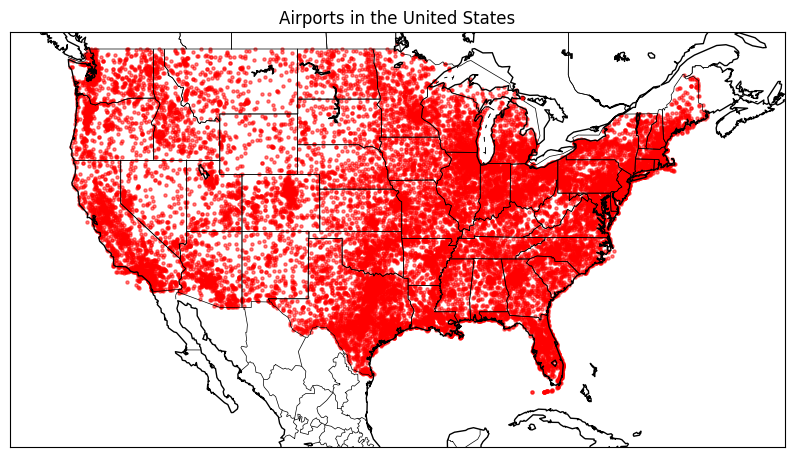

In [ ]:
# Basemap of the United States

plt.figure(figsize=(10, 6))
m = Basemap(llcrnrlon=-130, llcrnrlat=20, urcrnrlon=-60, urcrnrlat=50, projection='merc', resolution='l')

# Plot airports
x, y = m(us_airports_data['longitude_deg'].values, us_airports_data['latitude_deg'].values)
m.scatter(x, y, s=5, color='red', alpha=0.5)

m.drawcoastlines()
m.drawcountries()
m.drawstates()

plt.title('Airports in the United States')
plt.show()


In [ ]:
us_passengers=pd.read_csv('/content/drive/MyDrive/MDM&M/International_Report_Passengers_20240302.csv')
us_passengers.isna().sum()

us_passengers_23=us_passengers[us_passengers["Year"]==2023]
us_passengers_23 #there is no NA 24657 rows × 16 columns


us_freight=pd.read_csv('/content/drive/MyDrive/MDM&M/International_Report_Freight_20240302.csv')

us_freight_23=us_freight[us_freight["Year"]==2023]
us_freight_23 #there is no NA 14803 rows × 16 columns

merged_data_23 = pd.concat([us_freight_23, us_passengers_23], ignore_index=True)
merged_data_23 #39460

,data_dte,Year,Month,usg_apt_id,usg_apt,usg_wac,fg_apt_id,fg_apt,fg_wac,airlineid,carrier,carriergroup,type,Scheduled,Charter,Total
0,01/01/2023,2023,1,10194,AFW,74,16252,YXU,936,20372,KLQ,1,Freight,0,33,33
1,02/01/2023,2023,2,13303,MIA,33,11730,FOR,316,20167,JJ,0,Freight,47,0,47
2,02/01/2023,2023,2,13303,MIA,33,11731,FPO,204,20107,FX,1,Freight,15,0,15
3,02/01/2023,2023,2,13303,MIA,33,11760,FRA,429,19554,LH,0,Freight,389,0,389
4,02/01/2023,2023,2,13303,MIA,33,11868,GCM,233,19805,AA,1,Freight,5,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39455,02/01/2023,2023,2,13303,MIA,33,11760,FRA,429,19554,LH,0,Passengers,15820,0,15820
39456,02/01/2023,2023,2,13303,MIA,33,11731,FPO,204,20398,MQ,1,Passengers,5326,0,5326
39457,02/01/2023,2023,2,13303,MIA,33,11730,FOR,316,21605,G3,0,Passengers,964,0,964
39458,02/01/2023,2023,2,13303,MIA,33,11730,FOR,316,20167,JJ,0,Passengers,1479,0,1479


In [ ]:
us_airports_subset = us_airports[['id', 'type']]
merged_df = pd.merge(merged_data_23, us_airports_subset, left_on='usg_apt_id', right_on='id', how='left')
merged_df.drop(['id'], axis=1, inplace=True)
merged_df.rename(columns={'type_x': 'Passengers/Freight', 'type_y': 'size of airport'}, inplace=True)
codes=pd.read_excel('/content/drive/MyDrive/MDM&M/airports-code@public.xlsx')
sel=codes[['Airport Code','Airport Name','City Name','Country Name','Latitude',	'Longitude', 'coordinates']]
merged_23=pd.merge(merged_df, sel, left_on='usg_apt', right_on='Airport Code', how='left')
merged_23.rename(columns={'Airport Name':'Airport Name_origin','Latitude': 'latitude_origin', 'Longitude': 'longitude_origin', 'coordinates':'coordinates_origin', 'City Name':'City_origin','Country Name':'Country_origin'}, inplace=True)
merged_23.isna().sum()
sel2=codes[['Airport Code','Airport Name','Latitude',	'Longitude', 'coordinates','City Name','Country Name']]
merged_23=pd.merge(merged_23, sel2, left_on='fg_apt', right_on='Airport Code', how='left')
merged_23.rename(columns={'Latitude': 'latitude_dest', 'Longitude': 'longitude_dest', 'coordinates':'coordinates_dest','City Name':'City_dest','Country Name':'Country_dest','Airport Name':'Airport Name_dest'}, inplace=True)
columns_to_remove = ['Airport Code_x', 'Airport Code_y']
merged_23 = merged_23.drop(columns=columns_to_remove)
merged_23 = merged_23[merged_23['size of airport'] != 'closed']
merged_23 #after removing closed airports 30795 rows × 28 columns

merged_23.isna().sum()

data_dte                 0
Year                     0
Month                    0
usg_apt_id               0
usg_apt                  0
usg_wac                  0
fg_apt_id                0
fg_apt                   0
fg_wac                   0
airlineid                0
carrier                  0
carriergroup             0
Passengers/Freight       0
Scheduled                0
Charter                  0
Total                    0
size of airport        246
Airport Name_origin    156
City_origin            156
Country_origin         156
latitude_origin        156
longitude_origin       156
coordinates_origin     156
Airport Name_dest      156
latitude_dest          156
longitude_dest         156
coordinates_dest       156
City_dest              156
Country_dest           156
dtype: int64

In [ ]:
from google.colab import files
import pandas as pd

output_file = 'merged_23.xlsx'

try:
    merged_23.to_excel(output_file, index=False)
    print(f"Data saved to '{output_file}' successfully!")

    files.download(output_file)
except Exception as e:
    print("An error occurred:", e)

Data saved to 'merged_23.xlsx' successfully!


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#after filling NA
merged_data_23=pd.read_excel('/content/drive/MyDrive/MDM&M/NEW merged data_23.xlsx')
merged_data_23 # 30795 rows × 29 columns
merged_data_23.dropna(inplace=True)
merged_data_23 # 30670 rows × 29 columns
merged_data_23.isna().sum()


data_dte               0
Year                   0
Month                  0
usg_apt_id             0
usg_apt                0
usg_wac                0
fg_apt_id              0
fg_apt                 0
fg_wac                 0
airlineid              0
carrier                0
carriergroup           0
passengers/freight     0
Scheduled              0
Charter                0
Total                  0
size of airport        0
Airport Name_origin    0
City_origin            0
Country_origin         0
latitude_origin        0
longitude_origin       0
coordinates_origin     0
Airport Name_dest      0
latitude_dest          0
longitude_dest         0
coordinates_dest       0
City_dest              0
Country_dest           0
dtype: int64

In [ ]:
from math import radians, sin, cos, sqrt, atan2

def haversine(lat1, lon1, lat2, lon2):

    lat1, lon1, lat2, lon2 = map(radians, [lat1, lon1, lat2, lon2])

    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * atan2(sqrt(a), sqrt(1-a))
    r = 3958.8  # Radius of Earth in miles
    distance = r * c

    return distance


def preprocess_value(value):

    if isinstance(value, str):
        try:
            value = float(value.strip().replace(',', ''))
            return value
        except ValueError:
            return None
    else:
        return value

merged_data_23['latitude_origin'] = merged_data_23['latitude_origin'].apply(preprocess_value)
merged_data_23['longitude_origin'] = merged_data_23['longitude_origin'].apply(preprocess_value)
merged_data_23['latitude_dest'] = merged_data_23['latitude_dest'].apply(preprocess_value)
merged_data_23['longitude_dest'] = merged_data_23['longitude_dest'].apply(preprocess_value)


merged_data_23['distance_in_miles'] = merged_data_23.apply(lambda row: haversine(row['latitude_origin'], row['longitude_origin'], row['latitude_dest'], row['longitude_dest']), axis=1)
#in km
MILES_TO_KM = 1.60934
merged_data_23['distance_in_km'] = merged_data_23['distance_in_miles'] * MILES_TO_KM

merged_data_23

,data_dte,Year,Month,usg_apt_id,usg_apt,usg_wac,fg_apt_id,fg_apt,fg_wac,airlineid,...,longitude_origin,coordinates_origin,Airport Name_dest,latitude_dest,longitude_dest,coordinates_dest,City_dest,Country_dest,distance_in_miles,distance_in_km
0,02/01/2023,2023,2,13303,MIA,33,11730,FOR,316,20167,...,-80.266667,"25.783333, -80.266667",Pinto Martins,-3.776389,-38.532500,"-3.776389, -38.5325",Fortaleza,Brazil,3459.587449,5567.652465
1,02/01/2023,2023,2,13303,MIA,33,11731,FPO,204,20107,...,-80.266667,"25.783333, -80.266667",Grand Bahama International,26.558611,-78.695556,"26.558611, -78.695556",Freeport,Bahamas,111.179307,178.925306
2,02/01/2023,2023,2,13303,MIA,33,11760,FRA,429,19554,...,-80.266667,"25.783333, -80.266667",Frankfurt International Airport,50.026389,8.543056,"50.026389, 8.543056",Frankfurt,Germany,4822.544916,7761.114435
3,02/01/2023,2023,2,13303,MIA,33,11868,GCM,233,19805,...,-80.266667,"25.783333, -80.266667",Owen Roberts International,19.292778,-81.357778,"19.292778, -81.357778",Georgetown,Cayman Islands,453.823915,730.356980
4,02/01/2023,2023,2,13303,MIA,33,11868,GCM,233,19912,...,-80.266667,"25.783333, -80.266667",Owen Roberts International,19.292778,-81.357778,"19.292778, -81.357778",Georgetown,Cayman Islands,453.823915,730.356980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30790,02/01/2023,2023,2,13303,MIA,33,11760,FRA,429,19554,...,-80.266667,"25.783333, -80.266667",Frankfurt International Airport,50.026389,8.543056,"50.026389, 8.543056",Frankfurt,Germany,4822.544916,7761.114435
30791,02/01/2023,2023,2,13303,MIA,33,11731,FPO,204,20398,...,-80.266667,"25.783333, -80.266667",Grand Bahama International,26.558611,-78.695556,"26.558611, -78.695556",Freeport,Bahamas,111.179307,178.925306
30792,02/01/2023,2023,2,13303,MIA,33,11730,FOR,316,21605,...,-80.266667,"25.783333, -80.266667",Pinto Martins,-3.776389,-38.532500,"-3.776389, -38.5325",Fortaleza,Brazil,3459.587449,5567.652465
30793,02/01/2023,2023,2,13303,MIA,33,11730,FOR,316,20167,...,-80.266667,"25.783333, -80.266667",Pinto Martins,-3.776389,-38.532500,"-3.776389, -38.5325",Fortaleza,Brazil,3459.587449,5567.652465


In [ ]:
cost_data=pd.read_csv('/content/drive/MyDrive/MDM&M/Transportation_Services_Index_and_Seasonally-Adjusted_Transportation_Data_20240306.csv')
average_asm = 108244800.7
average_tsi_freight = 138.1
average_tsi_passenger = 108.7
new_row = {'ID': 'SATD202301', 'OBS_DATE': '01/01/2023',
           'ASM': average_asm, 'TSI_Freight': average_tsi_freight,
           'TSI_Passenger': average_tsi_passenger}
cost_data = pd.concat([pd.DataFrame([new_row]), cost_data]).reset_index(drop=True)
selected_columns=['ID', 'OBS_DATE','ASM','TSI_Freight','TSI_Passenger']
cost_data=cost_data[selected_columns]
cost_data
cost_data['ASM'] = cost_data['ASM'].fillna(average_asm)
cost_data['TSI_Passenger'] = cost_data['TSI_Passenger'].fillna(average_tsi_passenger)
cost_data
cost_data['OBS_DATE'] = pd.to_datetime(cost_data['OBS_DATE'])

cost_data['Month'] = cost_data['OBS_DATE'].dt.month
cost_data


,ID,OBS_DATE,ASM,TSI_Freight,TSI_Passenger,Month
0,SATD202301,2023-01-01,108244800.7,138.1,108.7,1
1,SATD202302,2023-02-01,91276075.0,139.8,107.1,2
2,SATD202303,2023-03-01,106781300.0,137.3,106.1,3
3,SATD202304,2023-04-01,104338836.0,136.0,106.6,4
4,SATD202305,2023-05-01,109788951.0,136.9,107.7,5
5,SATD202306,2023-06-01,111489108.0,136.8,107.4,6
6,SATD202307,2023-07-01,117336358.0,138.2,108.1,7
7,SATD202308,2023-08-01,116930630.0,138.5,109.6,8
8,SATD202309,2023-09-01,107000654.0,138.5,111.5,9
9,SATD202310,2023-10-01,111635974.0,140.1,111.0,10


In [ ]:
fuel=pd.read_excel('/content/drive/MyDrive/MDM&M/FUEL_20240306_143446.xlsx')
fuel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 10 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Month                                        12 non-null     int64  
 1   Domestic Consumption (million gallons)       12 non-null     float64
 2   domestic Cost (million dollars)              12 non-null     float64
 3   Domestic Cost per Gallon (dollars)           12 non-null     float64
 4   International Consumption (million gallons)  12 non-null     float64
 5   International Cost (million dollars)         12 non-null     float64
 6   International Cost per Gallon (dollars)      12 non-null     float64
 7   Total Consumption (million gallons)          12 non-null     float64
 8   Total Cost (million dollars)                 12 non-null     float64
 9   Total Cost per Gallon (dollars)              12 non-null     float64
dtypes: f

In [ ]:
#FUEL COST per gallon
domestic_fuel_costs = dict(zip(fuel['Month'], fuel['Domestic Cost per Gallon (dollars)']))
international_fuel_costs = dict(zip(fuel['Month'], fuel['International Cost per Gallon (dollars)']))

#FUEL CONSUMPTION
domestic_fuel_consumption = dict(zip(fuel['Month'], fuel['Domestic Consumption (million gallons)']))
international_fuel_consumption = dict(zip(fuel['Month'], fuel['International Consumption (million gallons)']))

# Example calculation for total distance flown by international flights per month
total_distance_per_month = merged_data_23.groupby(['carriergroup', 'Month'])['distance_in_km'].sum()

#convert to gallons
for month in fuel['Month']:

    domestic_consumption = float(fuel.loc[fuel['Month'] == month, 'Domestic Consumption (million gallons)'].values[0])
    international_consumption = float(fuel.loc[fuel['Month'] == month, 'International Consumption (million gallons)'].values[0])

    domestic_fuel_consumption[month] = domestic_consumption * 1e6  # Convert to gallons
    international_fuel_consumption[month] = international_consumption * 1e6  # Convert to gallons


# Estimate average fuel consumption per km for domestic flights
total_distance_dom_per_month = total_distance_per_month.loc[1]
avg_fuel_consumption_dom_per_km = {month: domestic_fuel_consumption[month] / total_distance_dom_per_month[month] for month in total_distance_dom_per_month.index}

# Estimate average fuel consumption per km for international flights
total_distance_intl_per_month = total_distance_per_month.loc[0]
avg_fuel_consumption_intl_per_km = {month: international_fuel_consumption[month] / total_distance_intl_per_month[month] for month in total_distance_intl_per_month.index}

avg_fuel_consumption_dom_per_km
avg_fuel_consumption_intl_per_km

{1: 56.88040547006428,
 2: 55.83429753009142,
 3: 62.41491280852824,
 4: 63.05951816874582,
 5: 64.5698036274269,
 6: 64.76105181602627,
 7: 66.68774777185206,
 8: 74.33938838289939,
 9: 62.78383065421115}

In [ ]:
# Constants
CRUISING_SPEED_KMH = 917  # Average cruising speed in km/h
FUEL_CONSUMPTION_GALLON_PER_HOUR = 3600  # Average fuel consumption in gallons per hour

# Calculate fuel cost for each flight
def calculate_fuel_cost(row):
    if row['carriergroup'] == '1':  # Domestic
        avg_consumption_per_km = avg_fuel_consumption_dom_per_km[row['Month']]  # This needs to be defined similarly
        cost_per_gallon = domestic_fuel_costs[row['Month']]
    else:  # International
        avg_consumption_per_km = avg_fuel_consumption_intl_per_km[row['Month']]
        cost_per_gallon = international_fuel_costs[row['Month']]

    # Calculate total fuel consumption for the flight based on its distance
    estimated_fuel_consumption = row['distance_in_miles'] * avg_consumption_per_km
    total_fuel_cost = estimated_fuel_consumption * cost_per_gallon
    return total_fuel_cost


merged_data_23['Fuel Cost'] = merged_data_23.apply(calculate_fuel_cost, axis=1)
merged_data_23


,data_dte,Year,Month,usg_apt_id,usg_apt,usg_wac,fg_apt_id,fg_apt,fg_wac,airlineid,...,coordinates_origin,Airport Name_dest,latitude_dest,longitude_dest,coordinates_dest,City_dest,Country_dest,distance_in_miles,distance_in_km,Fuel Cost
0,02/01/2023,2023,2,13303,MIA,33,11730,FOR,316,20167,...,"25.783333, -80.266667",Pinto Martins,-3.776389,-38.532500,"-3.776389, -38.5325",Fortaleza,Brazil,3459.587449,5567.652465,613128.455620
1,02/01/2023,2023,2,13303,MIA,33,11731,FPO,204,20107,...,"25.783333, -80.266667",Grand Bahama International,26.558611,-78.695556,"26.558611, -78.695556",Freeport,Bahamas,111.179307,178.925306,19703.851296
2,02/01/2023,2023,2,13303,MIA,33,11760,FRA,429,19554,...,"25.783333, -80.266667",Frankfurt International Airport,50.026389,8.543056,"50.026389, 8.543056",Frankfurt,Germany,4822.544916,7761.114435,854679.802095
3,02/01/2023,2023,2,13303,MIA,33,11868,GCM,233,19805,...,"25.783333, -80.266667",Owen Roberts International,19.292778,-81.357778,"19.292778, -81.357778",Georgetown,Cayman Islands,453.823915,730.356980,80429.346082
4,02/01/2023,2023,2,13303,MIA,33,11868,GCM,233,19912,...,"25.783333, -80.266667",Owen Roberts International,19.292778,-81.357778,"19.292778, -81.357778",Georgetown,Cayman Islands,453.823915,730.356980,80429.346082
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30790,02/01/2023,2023,2,13303,MIA,33,11760,FRA,429,19554,...,"25.783333, -80.266667",Frankfurt International Airport,50.026389,8.543056,"50.026389, 8.543056",Frankfurt,Germany,4822.544916,7761.114435,854679.802095
30791,02/01/2023,2023,2,13303,MIA,33,11731,FPO,204,20398,...,"25.783333, -80.266667",Grand Bahama International,26.558611,-78.695556,"26.558611, -78.695556",Freeport,Bahamas,111.179307,178.925306,19703.851296
30792,02/01/2023,2023,2,13303,MIA,33,11730,FOR,316,21605,...,"25.783333, -80.266667",Pinto Martins,-3.776389,-38.532500,"-3.776389, -38.5325",Fortaleza,Brazil,3459.587449,5567.652465,613128.455620
30793,02/01/2023,2023,2,13303,MIA,33,11730,FOR,316,20167,...,"25.783333, -80.266667",Pinto Martins,-3.776389,-38.532500,"-3.776389, -38.5325",Fortaleza,Brazil,3459.587449,5567.652465,613128.455620


In [ ]:
#Capacity
tsi_freight_dict = cost_data.set_index('Month')['TSI_Freight'].to_dict()
tsi_passenger_dict = cost_data.set_index('Month')['TSI_Passenger'].to_dict()
asm_dict = cost_data.set_index('Month')['ASM'].to_dict()

def fill_capacity_tsi(row):
    month = row['Month']
    passengers_freight = row['passengers/freight']
    if month in tsi_passenger_dict and passengers_freight == 'Passengers':
        return tsi_passenger_dict[month]
    elif month in tsi_freight_dict:
        return tsi_freight_dict[month]
    else:
        return None

def fill_capacity_asm(row):
    month = row['Month']
    if month in asm_dict:
        return asm_dict[month]
    else:
        return None
merged_data_23['capacity_tsi'] = merged_data_23.apply(fill_capacity_tsi, axis=1)
merged_data_23['capacity_asm'] = merged_data_23.apply(fill_capacity_asm, axis=1)


### For proving optimal solution



In [ ]:
#the most valuable months
summary_table = merged_data_23.groupby(['Month', 'passengers/freight']).size().reset_index(name='Count')
summary_table = summary_table.pivot(index='Month', columns='passengers/freight', values='Count').reset_index()
summary_table

passengers/freight,Month,Freight,Passengers
0,1,1251,2078
1,2,1239,1950
2,3,1291,2156
3,4,1313,2196
4,5,1324,2055
5,6,1354,2237
6,7,1375,2197
7,8,1308,2074
8,9,1306,1966


In [ ]:
merged_data_23['direction'] = merged_data_23['usg_apt'] + '-' + merged_data_23['fg_apt']

# Count the number of flights for each unique direction
direction_counts = merged_data_23['direction'].value_counts().reset_index()
direction_counts.columns = ['direction', 'flight_count'] #228-1

# Select rows where flight_count is greater than or equal to the threshold
more_than50 = direction_counts[direction_counts['flight_count'] >= 50]


more_than50_with_info = pd.merge(more_than50, merged_data_23, on='direction', how='left')
more_than50_with_info
#more_than50 #100
more_than50_with_info['usg_apt'].unique()


array(['MIA', 'LAX', 'HNL', 'BOS', 'ANC', 'ORD', 'IAH', 'MCO', 'SFO',
       'FLL', 'ATL', 'LAS'], dtype=object)

{30: 1.6,
 1: 23.794117647058822,
 17: 2.7058823529411766,
 4: 10.125,
 2: 14.0,
 5: 2.9,
 6: 7.333333333333333,
 3: 10.222222222222221,
 9: 3.2222222222222223,
 7: 6.714285714285714}

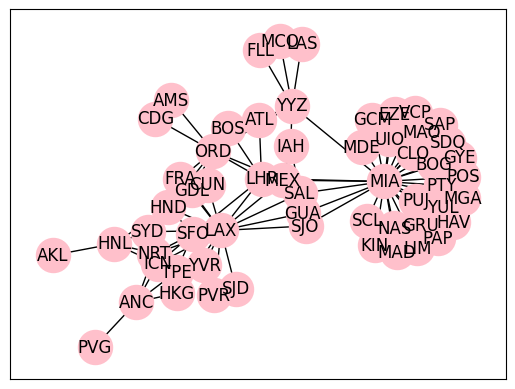

In [ ]:
FG = nx.from_pandas_edgelist(more_than50_with_info, source='usg_apt', target='fg_apt',edge_attr=True,)
FG.nodes()
FG.edges()
nx.draw_networkx(FG, with_labels=True,node_size=600, node_color='pink')
nx.algorithms.degree_centrality(FG)
nx.density(FG)
nx.average_shortest_path_length(FG)
nx.average_degree_connectivity(FG)

In [ ]:
import pandas as pd
url = "https://docs.google.com/u/1/uc?id=1_W4dbn8e-TXvalDnFJZ0FvI3Wb2OL5aM&export=view"
data= pd.read_excel(url)
data

,data_dte,Year,Month,usg_apt_id,usg_apt,usg_wac,fg_apt_id,fg_apt,fg_wac,airlineid,...,longitude_dest,coordinates_dest,City_dest,Country_dest,distance_in_miles,distance_in_km,Fuel Cost,capacity_tsi,capacity_asm,direction
0,02/01/2023,2023,2,13303,MIA,33,11730,FOR,316,20167,...,-38.532500,"-3.776389, -38.5325",Fortaleza,Brazil,3459.587449,5567.652465,613128.455620,139.8,91276075.0,MIA-FOR
1,02/01/2023,2023,2,13303,MIA,33,11731,FPO,204,20107,...,-78.695556,"26.558611, -78.695556",Freeport,Bahamas,111.179307,178.925306,19703.851296,139.8,91276075.0,MIA-FPO
2,02/01/2023,2023,2,13303,MIA,33,11760,FRA,429,19554,...,8.543056,"50.026389, 8.543056",Frankfurt,Germany,4822.544916,7761.114435,854679.802095,139.8,91276075.0,MIA-FRA
3,02/01/2023,2023,2,13303,MIA,33,11868,GCM,233,19805,...,-81.357778,"19.292778, -81.357778",Georgetown,Cayman Islands,453.823915,730.356980,80429.346082,139.8,91276075.0,MIA-GCM
4,02/01/2023,2023,2,13303,MIA,33,11868,GCM,233,19912,...,-81.357778,"19.292778, -81.357778",Georgetown,Cayman Islands,453.823915,730.356980,80429.346082,139.8,91276075.0,MIA-GCM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30665,02/01/2023,2023,2,13303,MIA,33,11760,FRA,429,19554,...,8.543056,"50.026389, 8.543056",Frankfurt,Germany,4822.544916,7761.114435,854679.802095,107.1,91276075.0,MIA-FRA
30666,02/01/2023,2023,2,13303,MIA,33,11731,FPO,204,20398,...,-78.695556,"26.558611, -78.695556",Freeport,Bahamas,111.179307,178.925306,19703.851296,107.1,91276075.0,MIA-FPO
30667,02/01/2023,2023,2,13303,MIA,33,11730,FOR,316,21605,...,-38.532500,"-3.776389, -38.5325",Fortaleza,Brazil,3459.587449,5567.652465,613128.455620,107.1,91276075.0,MIA-FOR
30668,02/01/2023,2023,2,13303,MIA,33,11730,FOR,316,20167,...,-38.532500,"-3.776389, -38.5325",Fortaleza,Brazil,3459.587449,5567.652465,613128.455620,107.1,91276075.0,MIA-FOR


# 5 - Scenario 1
*Fill in a section like this for each scenario*

# Mathematical model

**Sets**:
* `ij`: set of all airports
* `h`: set of potential hubs (subset of `i`)

**Our decision variables**:
1. Binary variable indicating whether the route from airport i to airport j uses hub h.

`Zijh=  1`: if route from i to j uses hub h, 0 otherwise

2. Decision variable representing the profit (or in our case, equivalent to distance) obtained from using hub h for the route from airport i to airport j.

`xijh`: is the number of passengers served by our company

**Objective**:
Maximize the total profit from flights that go from i to j through h (so the accumulated distance between these points) (or minimize the total distance cost) obtained from using the hubs. The objective function can be written as:


$$
\sum_{i \in \text{airports}} \sum_{j \in \text{airports}} \sum_{h \in \text{potential_hubs}} \text{Profit}_{ijh} \times \text{x}_{ijh}
$$

**Constraints**:
1. Route-Hub Dependency: This constraint links the route decision variables to the hub selection variables, ensuring that a route can only be assigned to a hub if that hub is selected
$$
Z_{ijh} \leq y_h, \text{ for all } i \in I, j \in J, h \in H
$$

2. Budget constraint: Limit the number of hubs to 2
$$
\sum_{h \in H} y_h \leq 2
$$

3. Route Utilization: Ensure that each route is served by at least one hub
$$
\sum_{h \in H} Z_{ijh} \geq 1, \quad \text{for all } i \in I, j \in J
$$

4. Capacity constraint: Limit the number of routes served by each hub
$$
\sum_{i \in I} \sum_{j \in J} x_{ijh} \leq K_h, \quad \text{for all } h \in H
$$

5. Demand fulfillment constraint: Ensure that the demand for each route is met

$$
\sum_{h \in \text{potential\_hubs}} x_{ijh} \leq \text{demand}_{ij}, \quad \text{for all } i \in \text{airports}, j \in \text{airports}
$$

6. Route from i to j is the same airport (which should result in a distance of 0) is to set the corresponding decision variable X to 0 in such cases.
$$
X_{ijh} = 0,
\text{for all } i, j \in \text{airports},\ h \in \text{potential_hubs},
\text{where } i = j
$$
7. Create a new constraint for the relationship between X[i, j, h] and Z[i, j, h]
$$
\text{For all } i, j \text{ in airports and } h \text{ in potential\_hubs:} \\
X[i, j, h] \leq \text{demand}[i, j] \times Z[i, j, h]
$$

### 5.1.1 - Preliminary operations
*Comment the code in the next cell that performs the preliminary operations, for example:*
- *load libraries,*
- *define functions.*

In [ ]:
flight_freq = data['usg_apt'].value_counts()
potential_hubs = flight_freq.head(5).index.tolist()
sampled_airports = data[~data['usg_apt'].isin(potential_hubs)].sample(n=30, random_state=42).reset_index(drop=True)
all_airports = pd.unique(sampled_airports[['usg_apt', 'fg_apt']].values.ravel('K'))

print(potential_hubs)
print(all_airports)


['MIA', 'LAX', 'ORD', 'EWR', 'IAH']
['SFB' 'DTW' 'SFO' 'PBI' 'SJU' 'MCO' 'FLL' 'CLT' 'BOS' 'IND' 'SMF' 'DOV'
 'ANC' 'LKE' 'TEB' 'PDX' 'MLB' 'HNL' 'PHL' 'FFO' 'YYZ' 'CDG' 'ZRH' 'MBJ'
 'GCM' 'AXA' 'MAN' 'CIW' 'BAQ' 'CUR' 'CUN' 'MXP' 'SDQ' 'FRA' 'ICN' 'TER'
 'HFE' 'ZNA' 'YQB' 'YYT' 'AMS' 'LGW' 'AKL' 'YHZ' 'TPE' 'RZE']


###Data Information
* data_dte - Date
* Year- Data Year
* **Month** - Data Month
* usg_apt_id - US Gateway Airport ID - assigned by US DOT to identify an airport
* **usg_apt** - US Gateway Airport Code IATA Origins
* usg_wac - US Gateway World Area Code - assigned by US DOT to represent a geographic territory
* fg_apt_id - Foreign Gateway Airport ID - assigned by US DOT to identify an airport
* **fg_apt** - Foreign Gateway Airport Code IATA Destination
* fg_wac - Foreign Gateway World Area Code - assigned by US DOT to represent a geographic territory
* airlineid - Airline ID - assigned by US DOT to identify an air carrier
* carrier - IATA-assigned air carrier code. If carrier has no IATA code, ICAO- or FAA-assigned code may be used
* carriergroup - Carrier Group Code - 1 denotes US domestic air carriers, 0 denotes foreign air carriers
* **passengers/freight** - type of flight
* **Scheduled** - Number of passengers carried by scheduled service operations
* **Charter** - Number of passengers carried by charter operations
* **Total** - Total passengers carried by scheduled service and charter operations
* size of airport - small/medium...
* Airport Name_origin - Airport name origin
* City_origin - City of origin airport
* Country_origin - Country of origin airport
* latitude_origin - relative position north or south on the Earth's surface of origin airport
* longitude_origin - geographic coordinate that specifies the east–west position of origin
* coordinates_origin - coordinates of origin airport
* Airport Name_dest - Airport name destination
* latitude_dest - relative position north or south on the Earth's surface of destination airport
* longitude_dest - geographic coordinate that specifies the east–west position of destination
* coordinates_dest - coordinates of destination airport
* City_dest - city of destination airport
* Country_dest - country of destination airport
* **distance_in_miles** - distance within flight at miles
* **distance_in_km** - distance within flight at km
* **Fuel Cost** - approximatly fuel consumption cost
* **capacity_tsi** - transportation service cost (the index TSI)
* capacity_asm - Available seat miles (ASM) is a measure of an airplane's carrying capacity available to generate revenues. Available seat miles refers to how many seat miles are actually available for purchase on an airline.
* direction - flights from where to where (origin-destination)





### 5.1.2 - Sets
*Comment the code in the next cell that defines the sets/lists needed to define the indexes of the model variables and constraints.*

In [ ]:
model = ConcreteModel("HUB model")
#Sets
model.airports = Set(initialize=all_airports)
model.potential_hubs = Set(initialize=potential_hubs)



In [ ]:
#Assumptions
#For objective distance
distances_df = data[(data['usg_apt'].isin(all_airports)) & (data['fg_apt'].isin(all_airports))]

# Create the dictionary using airport pairs as keys and distances as values
distances = {(row['usg_apt'], row['fg_apt']): row['distance_in_miles'] for index, row in distances_df.iterrows()}

passenger_data = data[['usg_apt', 'fg_apt', 'Total']].copy()
passenger_data = passenger_data[(passenger_data['usg_apt'].isin(all_airports)) & (passenger_data['fg_apt'].isin(all_airports))]

# Create a dictionary using airport pairs as keys and the number of passengers as values
passenger_counts = {(row['usg_apt'], row['fg_apt']): row['Total'] for _, row in passenger_data.iterrows()}
#Create the dictionary sing airport pairs as keys and the demand group for distance as values
demand = {}
for (i, j), dist in distances.items():
    if dist < 800:
        demand[(i, j)] = 80
    elif 800 <= dist <= 2500:
        demand[(i, j)] = 150
    else:  # dist > 2500
        demand[(i, j)] = 220

# Create a dictionary for hub capacities
hub_capacities = {hub: capacity for hub, capacity in zip(data['usg_apt'], data['capacity_asm']) if hub in potential_hubs}

### 5.1.3 - Parameters
*Comment the code in the next cell that reads the data described in Section 5 and defines the dictionaries and/or frames used in the model.*

In [ ]:
# Define the distance parameter
model.distances = Param(model.airports * model.airports, initialize=distances, within=NonNegativeReals, default=0)
for i in model.airports:
    for j in model.airports:
        distance_ij = model.distances[i, j]
        if distance_ij!=0:
            print(f"Distance from {i} to {j}: {distance_ij}")

# Define the parameter for passenger counts
model.passenger_counts = Param(model.airports * model.airports, initialize=passenger_counts, within=NonNegativeReals, default=0)
for i in model.airports:
    for j in model.airports:
        passengers_ij = model.passenger_counts[i, j]
        if passengers_ij != 0:
            print(f"Number of passengers from {i} to {j}: {passengers_ij}")

# Define the parameter for demand in distance group
model.demand = Param(model.airports * model.airports, initialize=demand, within=NonNegativeReals,default=0)
for i in model.airports:
    for j in model.airports:
        demand_ij = model.demand[i, j]
        if demand_ij!=0:
            print(f"Demand from {i} to {j}: {demand_ij}")

#Define the Hub capacity parameter
model.hub_capacities = Param(model.potential_hubs, initialize=hub_capacities, within=NonNegativeReals)
for i in model.potential_hubs:
        cap_i = model.hub_capacities[i]
        print(f"Capacity of hub {i}: {cap_i}")


Distance from SFB to YYZ: 1032.972150991686
Distance from SFB to SDQ: 1023.120945263595
Distance from DTW to YYZ: 213.7338487526842
Distance from DTW to CDG: 3951.250480385003
Distance from DTW to ZRH: 4243.419505920455
Distance from DTW to MBJ: 1669.224723626126
Distance from DTW to GCM: 1587.921607015471
Distance from DTW to CUN: 1477.380809702736
Distance from DTW to FRA: 4149.555673429979
Distance from DTW to ICN: 6620.437198152538
Distance from DTW to YYT: 1532.30957946021
Distance from DTW to AMS: 3929.341800090642
Distance from SFO to YYZ: 2253.927638870174
Distance from SFO to CDG: 5568.726533314422
Distance from SFO to ZRH: 5825.868105566495
Distance from SFO to MBJ: 2979.880048626019
Distance from SFO to CUN: 2405.495431655935
Distance from SFO to FRA: 5684.458896583705
Distance from SFO to ICN: 5645.405324031799
Distance from SFO to AMS: 5459.136514020267
Distance from SFO to LGW: 5378.052070541455
Distance from SFO to AKL: 6530.041433735715
Distance from SFO to TPE: 6457.26

### 5.1.4 - Variables

*Comment the code in the next cell that defines the variables of the model.*<br>
*Specifically, indicate whether the variables are:*
- *Decision variables, i.e., they model the DMs' decisions, or*
- *Auxiliary variables, i.e., they are used, for example, to linearize the model objectives/constraints.*<br>
*Specify the meaning and the nature (continuous, integer of binary) of each variable.*

In [ ]:
from itertools import permutations

#Decision Variables
model.Y = Var(potential_hubs, within=Binary) # Hub selection variable
model.Z = Var([(i, j, h) for i in all_airports for j in all_airports for h in potential_hubs], within=Binary) # Route usage variable
model.X = Var(model.airports, model.airports, model.potential_hubs, within=NonNegativeReals)

### 5.1.5 - Constraints and Objective(s)
*Comment the code in the next cell that defines the objectives and the constraints of the model.*<br>

In [ ]:
# Objective
model.Profit = Objective(
    expr=sum(model.X[i, j, h] * model.distances[i, j] * model.passenger_counts[i,j] for i in model.airports for j in model.airports for h in model.potential_hubs),
    sense=maximize)


In [ ]:
#Constraints
# 1: Route-Hub Dependency: This constraint links the route decision variables to the hub selection variables, ensuring that a route can only be assigned to a hub if that hub is selected
model.Route_Hub_Dependency = ConstraintList()
for i in model.airports:
    for j in model.airports:
        for h in model.potential_hubs:
            model.Route_Hub_Dependency.add(model.Z[i, j, h] <= model.Y[h])
#This states that for every route (i, j) and potential hub h, if Z[i, j, h] is 1 (meaning the route uses hub h),
#then Y[h] must also be 1 (meaning hub h is chosen).

# 2: Hub selection limit constraint
model.Hub_Selection_Limit = Constraint(expr=sum(model.Y[h] for h in model.potential_hubs) <= 2)


# 3: Route Utilization
# Ensure that each route is served by at least one hub
model.Route_Utilization = ConstraintList()
for i in model.airports:
    for j in model.airports:
        if i != j:  # Exclude routes from an airport to itself
            model.Route_Utilization.add(expr=sum(model.Z[i, j, h] for h in model.potential_hubs) >= 1)
# 4: Capacity constraint for each potential hub
model.Capacity_Constraint = ConstraintList()
for h in model.potential_hubs:
    # Sum of (passengers * distance) for all routes through hub h should not exceed the hub's capacity
     model.Capacity_Constraint.add(
        expr=sum(model.X[i, j, h] * model.distances[i, j] for i in model.airports for j in model.airports if i != j) <= model.hub_capacities[h])


# 5: Demand Fulfillment constraint
model.Demand_Fulfillment = ConstraintList()
for i in model.airports:
    for j in model.airports:
        if i != j:  #excluding routes from an airport to itself
            model.Demand_Fulfillment.add(expr=sum(model.X[i, j, h] for h in model.potential_hubs) <= model.demand[i, j])

# 6 Define the constraint
def not_same_airport_rule(model, i, j, h):
    if i == j:
         #If i and j are the same airport, set X[i, j, h] to 0
        return model.X[i, j, h] == 0
    else:
        return Constraint.Skip

model.not_same_airport_constraint = Constraint(model.airports, model.airports, model.potential_hubs, rule=not_same_airport_rule)

#7 Connection constraint between X and Z
model.Connection_Constraint = ConstraintList()
for i in model.airports:
    for j in model.airports:
        for h in model.potential_hubs:
            model.Connection_Constraint.add(expr=model.X[i, j, h] <= model.demand[i, j] * model.Z[i,j,h])


## 5.2 - Model solution
*Comment the code in the next cell that calls the functions that solve the model and stores the values of the variables.*

In [ ]:
# Solve the model
# Create a solver instance for CBC
solver = SolverFactory('cbc')

# Solve the model
#results = solver.solve(model)
results = solver.solve(model, tee=True)

# Check the solver status
if (results.solver.status == pyo.SolverStatus.ok) and (results.solver.termination_condition == pyo.TerminationCondition.optimal):
    # Print solver results
    print(results)
    print('\nSolver Status: ',  results.solver.status)

    print('\nOptimal solution found')
    objective_value = pyo.value(model.Profit)
    print("Total profit:", objective_value)
elif (results.solver.termination_condition == pyo.TerminationCondition.feasible):
      print('\nFeasible but not proven optimal solution found')
elif (results.solver.termination_condition == pyo.TerminationCondition.infeasible):
      raise Exception("The model is infeasible")
else:
    # Something else is wrong
    print('\nSolver Status: ',  results.solver.status)
    raise Exception(results.solver.status)


Welcome to the CBC MILP Solver 
Version: 2.10.7 
Build Date: Feb 14 2022 

command line - /usr/bin/cbc -printingOptions all -import /tmp/tmpgbfo5ycf.pyomo.lp -stat=1 -solve -solu /tmp/tmpgbfo5ycf.pyomo.soln (default strategy 1)
Option for printingOptions changed from normal to all
 CoinLpIO::readLp(): Maximization problem reformulated as minimization
Coin0009I Switching back to maximization to get correct duals etc
Presolve 13356 (-12180) rows, 11130 (-10035) columns and 34155 (-20070) elements
Statistics for presolved model
Original problem has 10585 integers (10585 of which binary)
Presolved problem has 10355 integers (10355 of which binary)
==== 10355 zero objective 156 different
==== absolute objective values 156 different
==== for integers 10355 zero objective 1 different
10355 variables have objective of -0
==== for integers absolute objective values 1 different
10355 variables have objective of 0
===== end objective counts


Problem has 13356 rows, 11130 columns (775 with object

## 5.3 - Analysis
*Our model is solving the problem and identifying 2 hubs for opening in the US by the company maximising the profit*

The reason can be in existance some bag in collab whith apearing if the solver getting firs fast result.

In order to prove that our model is solving correct and optimal solution is LAX and IAH, we are going to check all constraints on the violation.

In [ ]:
if str(results.Solver.status) == 'ok':
    # Print decision variables
    print("Decision Variables:")
    unique_hubs = set()
    for i in model.airports:
        for j in model.airports:
            for h in model.potential_hubs:
                value_xijh = model.X[i, j, h].value
                value_zij = model.Z[i, j, h].value
                value_y = model.Y[h].value
                total = value_zij
                profit= model.distances[i, j] * model.passenger_counts[i,j]

                if value_xijh > 0.0001:
                    print(i, j, h, value_xijh, value_zij, value_y, profit)
                    if value_y == 1:
                        unique_hubs.add(h)

    print("Unique hubs chosen:")
    print(unique_hubs)
else:
    print("Solver failed to solve the problem.")



Decision Variables:
SFB YYZ EWR 150.0 1.0 1.0 2315923.56252336
SFB SDQ MIA 150.0 1.0 1.0 89011.52223793276
DTW YYZ MIA 80.0 1.0 1.0 16030.038656451316
DTW CDG MIA 220.0 1.0 1.0 32526693.954529345
DTW ZRH MIA 220.0 1.0 1.0 1977433.489758932
DTW MBJ MIA 150.0 1.0 1.0 15512105.356657589
DTW GCM MIA 150.0 1.0 1.0 193726.43605588746
DTW CUN MIA 150.0 1.0 1.0 45299450.38710529
DTW FRA EWR 220.0 1.0 1.0 41599295.626135536
DTW ICN EWR 220.0 1.0 1.0 121829285.32040301
DTW YYT MIA 150.0 1.0 1.0 390738.9427623536
DTW AMS MIA 220.0 1.0 1.0 133283273.85907458
SFO YYZ EWR 150.0 1.0 1.0 59445087.54756197
SFO CDG EWR 220.0 1.0 1.0 86499029.24197292
SFO ZRH MIA 220.0 1.0 1.0 69543387.57614724
SFO MBJ MIA 220.0 1.0 1.0 29798.80048626019
SFO CUN MIA 150.0 1.0 1.0 7211675.304104494
SFO FRA EWR 220.0 1.0 1.0 99034642.8962813
SFO ICN MIA 220.0 1.0 1.0 82135002.05933864
SFO AMS MIA 220.0 1.0 1.0 55775997.76374507
SFO LGW MIA 220.0 1.0 1.0 38340133.21089003
SFO AKL MIA 220.0 1.0 1.0 60024140.85889869
SFO TPE 

* EWR - Newark Liberty International Airport
* MIA - Miami International Airport (MIA)

In [ ]:
# Check the constrants in order to check infeasiability of model
# Check violated constraints
violated_constraints = []

# 1. Route-Hub Dependency constraint
for i in model.airports:
    for j in model.airports:
        for h in model.potential_hubs:
            if model.Z[i, j, h].value is not None and model.Y[h].value is not None:
                if model.Z[i, j, h].value > model.Y[h].value:
                    violated_constraints.append(('Route_Hub_Dependency', (i, j, h)))

# 2. Hub Selection Limit constraint
if sum(model.Y[h].value for h in model.potential_hubs) > 2:
    violated_constraints.append(('Hub_Selection_Limit', None))

# 3. Route Utilization constraint
for i in model.airports:
    for j in model.airports:
        if i != j:
            if sum(model.Z[i, j, h].value for h in model.potential_hubs) < 1:
                violated_constraints.append(('Route_Utilization', (i, j)))

# 4. Capacity constraint for each potential hub
for h in model.potential_hubs:
    if sum(model.X[i, j, h].value * model.distances[i, j] for i in model.airports for j in model.airports if i != j) > model.hub_capacities[h]:
        violated_constraints.append(('Capacity_Constraint', h))

# 5. Demand Fulfillment constraint
for i in model.airports:
    for j in model.airports:
        if i != j:
            if sum(model.X[i, j, h].value for h in model.potential_hubs)- model.demand[i, j]>=1:
                violated_constraints.append(('Demand_Fulfillment', (i, j)))

# 6. Not same airport constraint
for i in model.airports:
    for j in model.airports:
        for h in model.potential_hubs:
            if i == j and model.X[i, j, h].value > 0:
                violated_constraints.append(('Not_Same_Airport', (i, j, h)))

# 7. Connection constraint between X and Z
for i in model.airports:
    for j in model.airports:
        for h in model.potential_hubs:
            if model.X[i, j, h].value is not None and model.Z[i, j, h].value is not None:
                if model.X[i, j, h].value > model.demand[i, j] * model.Z[i, j, h].value:
                    violated_constraints.append(('Connection_Constraint', (i, j, h)))

# Print violated constraints
if violated_constraints:
    print("Violated Constraints:")
    for constraint_name, key in violated_constraints:
        print(f"Constraint {constraint_name} is violated for key {key}.")
else:
    print("No violated constraints.")


No violated constraints.


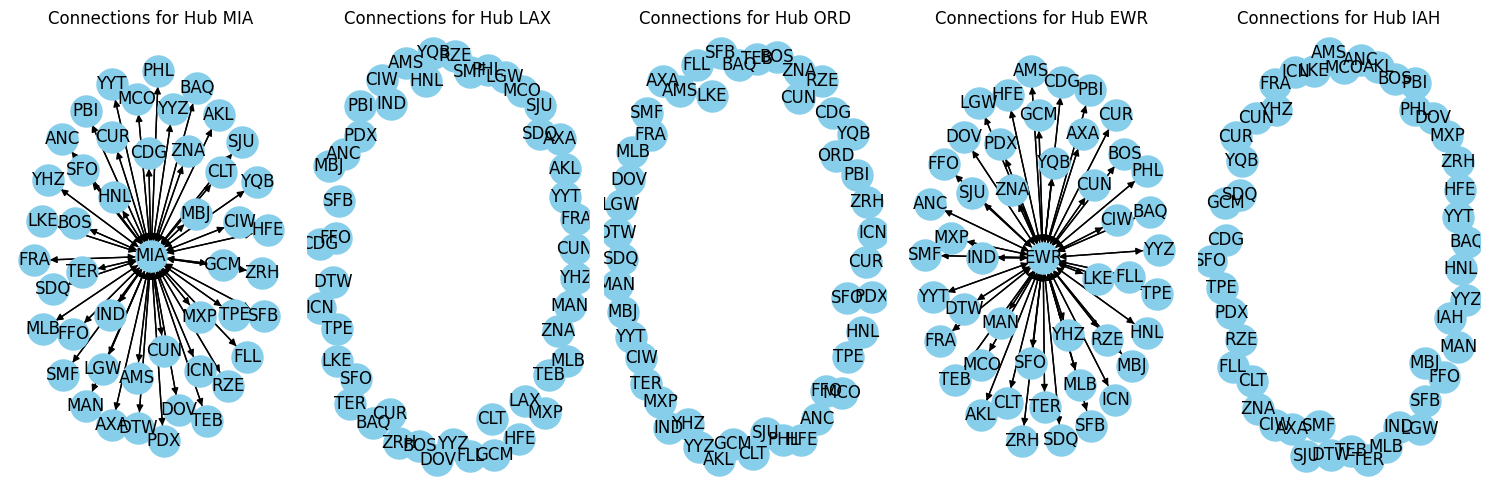

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a directed graph
G = nx.DiGraph()

# Create a dictionary to store edges for each hub
hub_edges = {h: [] for h in model.potential_hubs}

# Add nodes for airports and hubs
G.add_nodes_from(model.airports, bipartite=0)
G.add_nodes_from(model.potential_hubs, bipartite=1)

# Add edges based on the model's decision variables
for i in model.airports:
    for j in model.airports:
        for h in model.potential_hubs:
            if model.Z[i, j, h].value == 1:
                hub_edges[h].append((i, h))
                hub_edges[h].append((h, j))

# Plot each hub's connections separately
fig, axs = plt.subplots(1, len(model.potential_hubs), figsize=(15, 5))

for i, hub in enumerate(model.potential_hubs):
    G = nx.DiGraph()
    G.add_nodes_from(model.airports, bipartite=0)
    G.add_nodes_from([hub], bipartite=1)
    G.add_edges_from(hub_edges[hub])

    ax = axs[i] if len(model.potential_hubs) > 1 else axs
    pos = nx.spring_layout(G)
    nx.draw(G, pos, ax=ax, with_labels=True, node_color='skyblue', node_size=500, arrows=True)
    ax.set_title(f'Connections for Hub {hub}')

plt.tight_layout()
plt.show()



In [ ]:
unique_airports = {}

for i in model.airports:
    for j in model.airports:
        for h in model.potential_hubs:
            value_xijh = model.X[i, j, h].value
            value_zij = model.Z[i, j, h].value
            value_y = model.Y[h].value

            if value_xijh > 0.0001:
                unique_airports[i] = None
                unique_airports[j] = None
                unique_airports[h] = None

for airport in unique_airports.keys():
    if airport in data['usg_apt'].values:
        # If airport is in 'usg_apt' column, get coordinates_origin
        coordinates = data.loc[data['usg_apt'] == airport, 'coordinates_origin'].iloc[0]
    elif airport in data['fg_apt'].values:
        # If airport is in 'fg_apt' column, get coordinates_dest
        coordinates = data.loc[data['fg_apt'] == airport, 'coordinates_dest'].iloc[0]
    else:
        # If airport is not found in data, set coordinates to None or any default value
        coordinates = None

    # Assign coordinates to the airport code in the dictionary
    unique_airports[airport] = coordinates

# Display the unique_airports dictionary
unique_airports




{'SFB': '28.783333, -81.25',
 'YYZ': '43.677222, -79.630556',
 'EWR': '40.6925, -74.168611',
 'SDQ': '18.429722, -69.668889',
 'MIA': '25.783333, -80.266667',
 'DTW': '42.2125, -83.353333',
 'CDG': '49.016667, 2.55',
 'ZRH': '47.464722, 8.549167',
 'MBJ': '18.5, -77.916667',
 'GCM': '19.292778, -81.357778',
 'CUN': '21.036667, -86.876944',
 'FRA': '50.026389, 8.543056',
 'ICN': '37.469167, 126.450556',
 'YYT': '47.618611, -52.751944',
 'AMS': '52.308611, 4.763889',
 'SFO': '37.618889, -122.375',
 'LGW': '51.148056, -0.190278',
 'AKL': '-37.008056, 174.791667',
 'TPE': '25.077778, 121.223889',
 'PBI': '26.683056, -80.095556',
 'AXA': '18.204722, -63.055',
 'CIW': '12.716667, -61.333333',
 'CUR': '12.2, -68.966667',
 'MXP': '45.633333, 8.733333',
 'SJU': '18.439444, -66.001944',
 'MCO': '28.429444, -81.308889',
 'MAN': '53.35, -2.266667',
 'YQB': '46.791111, -71.393333',
 'YHZ': '44.880833, -63.508611',
 'RZE': '50.043333, 22.016667',
 'FLL': '26.0725, -80.152778',
 'BAQ': '10.883333, -7

In [ ]:
!pip install folium
import folium

# Create a map centered around the first airport's coordinates
map_center = list(unique_airports.values())[0].split(',')
mymap = folium.Map(location=[float(map_center[0]), float(map_center[1])], zoom_start=5)

# Plot airports
for airport, coordinates in unique_airports.items():
    if coordinates is not None:
        # Split coordinates string into latitude and longitude
        lat, lon = map(float, coordinates.split(','))
        # Add marker for each airport
        if airport in ['MIA', 'EWR']:
            folium.Marker(location=[lat, lon], popup=airport, icon=folium.Icon(color='red')).add_to(mymap)
        else:
            folium.Marker(location=[lat, lon], popup=airport).add_to(mymap)

# Display the map
mymap




In [ ]:
summary_data = []

# Iterate over the decision variables and collect data for the summary
for i in model.airports:
    for j in model.airports:
        for h in model.potential_hubs:
            value_xijh = model.X[i, j, h].value

            # If X[i, j, h] is greater than 0.0001, add the data to the summary
            if value_xijh > 0.0001:
                objective_value = value_xijh * model.distances[i, j] * model.passenger_counts[i, j]
                summary_data.append({'i': i, 'j': j, 'h': h, 'Objective': objective_value})

# Create a DataFrame from the summary data
summary_df = pd.DataFrame(summary_data)

# Sort the DataFrame by the 'Objective' column in descending order
summary_df = summary_df.sort_values(by='Objective', ascending=False)

# Calculate the number of rows representing the top 10% of results
top_10_percent = int(len(summary_df) * 0.1)

# Select only the top 10% of rows
top_10_percent_df = summary_df.head(top_10_percent)

print(top_10_percent_df)

       i    j    h     Objective
11   DTW  AMS  MIA  2.932232e+10
22   SFO  TPE  MIA  2.787071e+10
9    DTW  ICN  EWR  2.680244e+10
17   SFO  FRA  EWR  2.178762e+10
53   MCO  LGW  EWR  2.027726e+10
13   SFO  CDG  EWR  1.902979e+10
18   SFO  ICN  MIA  1.806970e+10
139  HNL  ICN  MIA  1.802757e+10
14   SFO  ZRH  MIA  1.529955e+10
49   MCO  FRA  EWR  1.512171e+10
52   MCO  AMS  EWR  1.339417e+10
21   SFO  AKL  MIA  1.320531e+10
19   SFO  AMS  MIA  1.227072e+10
89   BOS  ICN  MIA  1.177303e+10
133  PDX  AMS  MIA  1.034014e+10


# 6 - Scenario 2


## 6.1 - Mathematical model

In the second scenario we decide to change the way of calculation of Demand in order to make it more sufficient and near to real concept.
To calculate the demand for each route, we iterate over the items of the distances2 dictionary. For each pair of airports (i, j) and their corresponding distance dist, we calculate the demand using the following formula:

$$
\text{Demand} = \text{distance}_{ij}  \times \text{passengers}_i \times \left( \frac{\text{passengers}_j}{\text{total_passengers} - \text{passengers}_i} \right)
$$


### 6.1.1 - Preliminary operations

In [ ]:
model2 = ConcreteModel("HUB model2")

### 6.1.2 - Sets

In [ ]:
model2.airports = Set(initialize=all_airports)
model2.potential_hubs = Set(initialize=potential_hubs)

In [ ]:
distances_df = data[(data['usg_apt'].isin(all_airports)) & (data['fg_apt'].isin(all_airports))]

# Create the dictionary using airport pairs as keys and distances as values
distances2 = {(row['usg_apt'], row['fg_apt']): row['distance_in_miles'] for index, row in distances_df.iterrows()}
# Create a dictionary to store demand for each route
demand_dict2 = {}

# Calculate demand for each route
for (i, j), dist in distances2.items():
    total_passengers = sum(passenger_data['Total'])  # Total passengers in the data
    passengers_i = passenger_data[passenger_data['usg_apt'] == i]['Total'].sum()  # Passengers from airport i
    passengers_j = passenger_data[passenger_data['fg_apt'] == j]['Total'].sum()  # Passengers to airport j

    demand = dist * passengers_i * (passengers_j / (total_passengers - passengers_i))
    demand_dict2[(i, j)] = demand
demand_dict2



{('ANC', 'ICN'): 270822046.23755217,
 ('ANC', 'TPE'): 238847946.763279,
 ('ANC', 'YHZ'): 17079399.769799225,
 ('ANC', 'YYZ'): 356038752.34977925,
 ('ANC', 'HFE'): 1090971.120328998,
 ('BOS', 'AMS'): 552645147.0594789,
 ('BOS', 'CDG'): 514007882.3433059,
 ('BOS', 'CUN'): 497182452.85728663,
 ('BOS', 'FRA'): 623349353.0619137,
 ('BOS', 'ICN'): 1432924214.6649418,
 ('BOS', 'ZRH'): 257559680.51662967,
 ('CLT', 'CUN'): 171526960.66712695,
 ('CLT', 'FRA'): 429045919.12731224,
 ('CLT', 'GCM'): 13830804.469471786,
 ('CLT', 'MBJ'): 105892546.0839298,
 ('CLT', 'YYZ'): 117115754.74508426,
 ('DOV', 'TER'): 812.4296963320711,
 ('DTW', 'AMS'): 512056984.69499207,
 ('DTW', 'CDG'): 480061658.9480218,
 ('DTW', 'FRA'): 574664541.1515312,
 ('DTW', 'ICN'): 1131788865.0493567,
 ('DTW', 'MBJ'): 213893041.10328978,
 ('FFO', 'RZE'): 3.3045737350267714,
 ('FLL', 'SDQ'): 89992376.8755598,
 ('FLL', 'YYZ'): 376632602.09189665,
 ('HNL', 'AKL'): 43762670.63057592,
 ('HNL', 'ICN'): 230387587.63239262,
 ('HNL', 'YYZ'

### 6.1.3 - Parameters

In [ ]:
# Define the distance parameter
model2.distances = Param(model2.airports * model2.airports, initialize=distances2, within=NonNegativeReals, default=0)
for i in model2.airports:
    for j in model2.airports:
        distance_ij = model2.distances[i, j]
        if distance_ij!=0:
            print(f"Distance from {i} to {j}: {distance_ij}")

# Define the parameter for passenger counts
model2.passenger_counts = Param(model2.airports * model2.airports, initialize=passenger_counts, within=NonNegativeReals, default=0)
for i in model2.airports:
    for j in model2.airports:
        passengers_ij = model2.passenger_counts[i, j]
        if passengers_ij != 0:
            print(f"Number of passengers from {i} to {j}: {passengers_ij}")

# Define the parameter for demand in distance group
model2.demand = Param(model2.airports * model2.airports, initialize=demand_dict2, within=NonNegativeReals, default=0)
for i in model2.airports:
    for j in model2.airports:
        distance_ij = model2.demand[i, j]
        if distance_ij!=0:
            print(f"Demand from {i} to {j}: {distance_ij}")

#Define the Hub capacity parameter
model2.hub_capacities = Param(model2.potential_hubs, initialize=hub_capacities, within=NonNegativeReals)
for i in model2.potential_hubs:
        cap_i = model2.hub_capacities[i]
        print(f"Capacity of hub {i}: {cap_i}")








Distance from SFB to YYZ: 1032.972150991686
Distance from SFB to SDQ: 1023.120945263595
Distance from DTW to YYZ: 213.7338487526842
Distance from DTW to CDG: 3951.250480385003
Distance from DTW to ZRH: 4243.419505920455
Distance from DTW to MBJ: 1669.224723626126
Distance from DTW to GCM: 1587.921607015471
Distance from DTW to CUN: 1477.380809702736
Distance from DTW to FRA: 4149.555673429979
Distance from DTW to ICN: 6620.437198152538
Distance from DTW to YYT: 1532.30957946021
Distance from DTW to AMS: 3929.341800090642
Distance from SFO to YYZ: 2253.927638870174
Distance from SFO to CDG: 5568.726533314422
Distance from SFO to ZRH: 5825.868105566495
Distance from SFO to MBJ: 2979.880048626019
Distance from SFO to CUN: 2405.495431655935
Distance from SFO to FRA: 5684.458896583705
Distance from SFO to ICN: 5645.405324031799
Distance from SFO to AMS: 5459.136514020267
Distance from SFO to LGW: 5378.052070541455
Distance from SFO to AKL: 6530.041433735715
Distance from SFO to TPE: 6457.26

### 6.1.4 - Variables

In [ ]:
from itertools import permutations

#Decision Variables
model2.Y = Var(potential_hubs, within=Binary) # Hub selection variable
model2.Z = Var([(i, j, h) for i in all_airports for j in all_airports for h in potential_hubs], within=Binary) # Route usage variable
model2.X = Var(model2.airports, model2.airports, model2.potential_hubs, within=NonNegativeReals)

This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().
This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().
This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


### 6.1.5 - Constraints and objective(s)

In [ ]:
# Objective
model2.Profit = Objective(
    expr=sum(model2.X[i, j, h] * model2.distances[i, j] * model2.passenger_counts[i,j] for i in model2.airports for j in model2.airports for h in model2.potential_hubs),
    sense=maximize)


This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


In [ ]:
#Constraints
# 1: Route-Hub Dependency: This constraint links the route decision variables to the hub selection variables, ensuring that a route can only be assigned to a hub if that hub is selected
model2.Route_Hub_Dependency = ConstraintList()
for i in model2.airports:
    for j in model2.airports:
        for h in model2.potential_hubs:
            model2.Route_Hub_Dependency.add(model2.Z[i, j, h] <= model2.Y[h])
#This states that for every route (i, j) and potential hub h, if Z[i, j, h] is 1 (meaning the route uses hub h),
#then Y[h] must also be 1 (meaning hub h is chosen).

# 2: Hub selection limit constraint
model2.Hub_Selection_Limit = Constraint(expr=sum(model2.Y[h] for h in model2.potential_hubs) <= 2)


# 3: Route Utilization
# Ensure that each route is served by at least one hub
model2.Route_Utilization = ConstraintList()
for i in model2.airports:
    for j in model2.airports:
        if i != j:  # Exclude routes from an airport to itself
            model2.Route_Utilization.add(expr=sum(model2.Z[i, j, h] for h in model2.potential_hubs) >= 1)
# 4: Capacity constraint for each potential hub
model2.Capacity_Constraint = ConstraintList()
for h in model2.potential_hubs:
    # Sum of (passengers * distance) for all routes through hub h should not exceed the hub's capacity
     model2.Capacity_Constraint.add(
        expr=sum(model2.X[i, j, h] * model2.demand[i, j] for i in model2.airports for j in model2.airports if i != j) <= model2.hub_capacities[h])


# 5: Demand Fulfillment constraint
model2.Demand_Fulfillment = ConstraintList()
for i in model2.airports:
    for j in model2.airports:
        if i != j:  #excluding routes from an airport to itself
            model2.Demand_Fulfillment.add(expr=sum(model2.X[i, j, h] for h in model2.potential_hubs) <= model2.demand[i, j])

# 6 Define the constraint
def not_same_airport_rule(model2, i, j, h):
    if i == j:
         #If i and j are the same airport, set X[i, j, h] to 0
        return model2.X[i, j, h] == 0
    else:
        return Constraint.Skip

model2.not_same_airport_constraint = Constraint(model2.airports, model2.airports, model2.potential_hubs, rule=not_same_airport_rule)

#7 Connection constraint between X and Z
model2.Connection_Constraint = ConstraintList()
for i in model2.airports:
    for j in model2.airports:
        for h in model2.potential_hubs:
            model2.Connection_Constraint.add(expr=model2.X[i, j, h] <= model2.demand[i, j] * model2.Z[i,j,h])


## 6.2 - Model solution

In [ ]:
# Solve the model
# Create a solver instance for CBC
solver = SolverFactory('cbc')

# Solve the model
#results = solver.solve(model)
results = solver.solve(model2, tee=True)

# Check the solver status
if (results.solver.status == pyo.SolverStatus.ok) and (results.solver.termination_condition == pyo.TerminationCondition.optimal):
    # Print solver results
    print(results)
    print('\nSolver Status: ',  results.solver.status)

    print('\nOptimal solution found')
    objective_value = pyo.value(model2.Profit)
    print("Total profit:", objective_value)
elif (results.solver.termination_condition == pyo.TerminationCondition.feasible):
      print('\nFeasible but not proven optimal solution found')
elif (results.solver.termination_condition == pyo.TerminationCondition.infeasible):
      raise Exception("The model is infeasible")
else:
    # Something else is wrong
    print('\nSolver Status: ',  results.solver.status)
    raise Exception(results.solver.status)


Welcome to the CBC MILP Solver 
Version: 2.10.7 
Build Date: Feb 14 2022 

command line - /usr/bin/cbc -printingOptions all -import /tmp/tmp0sa6tvd_.pyomo.lp -stat=1 -solve -solu /tmp/tmp0sa6tvd_.pyomo.soln (default strategy 1)
Option for printingOptions changed from normal to all
 CoinLpIO::readLp(): Maximization problem reformulated as minimization
Coin0009I Switching back to maximization to get correct duals etc
Presolve 13216 (-12320) rows, 11130 (-10035) columns and 33455 (-20770) elements
Statistics for presolved model
Original problem has 10585 integers (10585 of which binary)
Presolved problem has 10355 integers (10355 of which binary)
==== 10355 zero objective 156 different
==== absolute objective values 156 different
==== for integers 10355 zero objective 1 different
10355 variables have objective of -0
==== for integers absolute objective values 1 different
10355 variables have objective of 0
===== end objective counts


Problem has 13216 rows, 11130 columns (775 with object

## 6.3 - Analysis

In [ ]:
if str(results.Solver.status) == 'ok':
    # Print decision variables
    print("Decision Variables:")
    unique_hubs = set()
    for i in model2.airports:
        for j in model2.airports:
            for h in model2.potential_hubs:
                value_xijh = model2.X[i, j, h].value
                value_zij = model2.Z[i, j, h].value
                value_y = model2.Y[h].value
                total = value_zij

                if value_xijh > 0.0001:
                    print(i, j, h, value_xijh, value_zij, value_y)
                    if value_y == 1:
                        unique_hubs.add(h)

    print("Unique hubs chosen:")
    print(unique_hubs)
else:
    print("Solver failed to solve the problem.")



Decision Variables:
PBI CIW IAH 109.21912 1.0 1.0
PBI CUR LAX 3415.1103 1.0 1.0
PBI CUR IAH 3446.9173 1.0 1.0
DOV TER LAX 812.4297 1.0 1.0
DOV RZE LAX 26.629295 1.0 1.0
LKE ZNA LAX 0.70325039 1.0 1.0
TEB AXA LAX 427.33676 1.0 1.0
TEB CIW IAH 4.0925943 1.0 1.0
TEB MXP LAX 193.95218 1.0 1.0
TEB YYT LAX 360.11617 1.0 1.0
FFO RZE LAX 3.3045737 1.0 1.0
Unique hubs chosen:
{'IAH', 'LAX'}


* LAX - Los Angeles International Airport
* IAH - George Bush Intercontinental Airport

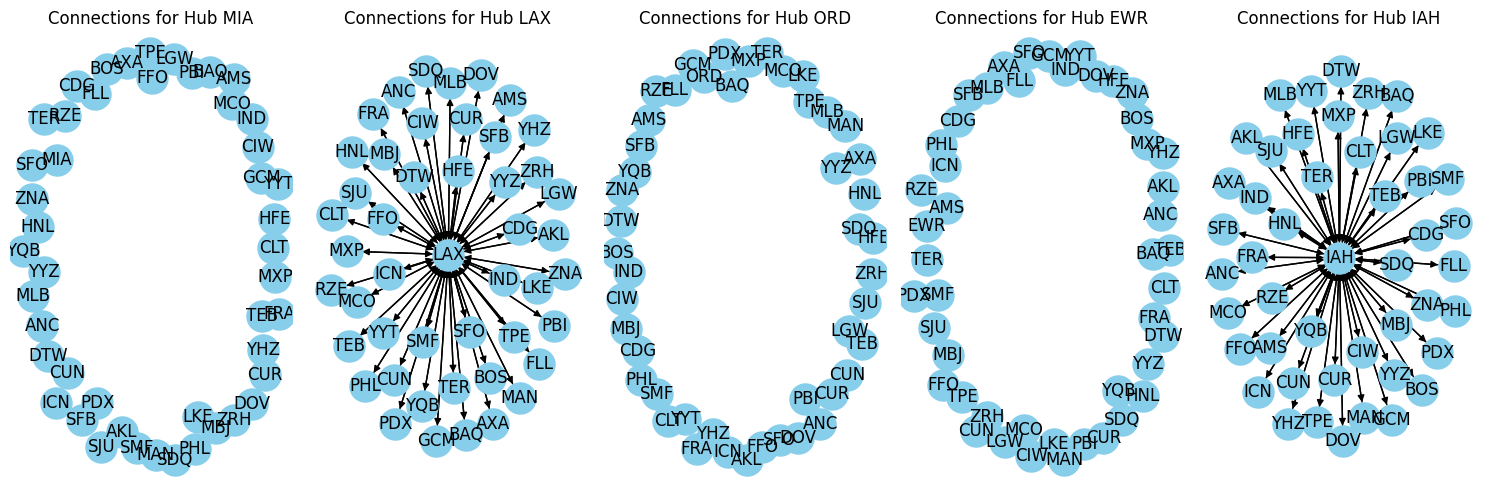

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a directed graph
G = nx.DiGraph()

# Create a dictionary to store edges for each hub
hub_edges = {h: [] for h in model2.potential_hubs}

# Add nodes for airports and hubs
G.add_nodes_from(model2.airports, bipartite=0)
G.add_nodes_from(model2.potential_hubs, bipartite=1)

# Add edges based on the model's decision variables
for i in model2.airports:
    for j in model2.airports:
        for h in model2.potential_hubs:
            if model2.Z[i, j, h].value == 1:
                hub_edges[h].append((i, h))
                hub_edges[h].append((h, j))

# Plot each hub's connections separately
fig, axs = plt.subplots(1, len(model2.potential_hubs), figsize=(15, 5))

for i, hub in enumerate(model2.potential_hubs):
    G = nx.DiGraph()
    G.add_nodes_from(model2.airports, bipartite=0)
    G.add_nodes_from([hub], bipartite=1)
    G.add_edges_from(hub_edges[hub])

    ax = axs[i] if len(model2.potential_hubs) > 1 else axs
    pos = nx.spring_layout(G)
    nx.draw(G, pos, ax=ax, with_labels=True, node_color='skyblue', node_size=500, arrows=True)
    ax.set_title(f'Connections for Hub {hub}')

plt.tight_layout()
plt.show()



In [ ]:
#Constraints
# 1: Route-Hub Dependency: This constraint links the route decision variables to the hub selection variables, ensuring that a route can only be assigned to a hub if that hub is selected
model2.Route_Hub_Dependency = ConstraintList()
for i in model2.airports:
    for j in model2.airports:
        for h in model2.potential_hubs:
            model2.Route_Hub_Dependency.add(model2.Z[i, j, h] <= model2.Y[h])
#This states that for every route (i, j) and potential hub h, if Z[i, j, h] is 1 (meaning the route uses hub h),
#then Y[h] must also be 1 (meaning hub h is chosen).

# 2: Hub selection limit constraint
model2.Hub_Selection_Limit = Constraint(expr=sum(model2.Y[h] for h in model2.potential_hubs) <= 5)


# 3: Route Utilization
# Ensure that each route is served by at least one hub
model2.Route_Utilization = ConstraintList()
for i in model2.airports:
    for j in model2.airports:
        if i != j:  # Exclude routes from an airport to itself
            model2.Route_Utilization.add(expr=sum(model2.Z[i, j, h] for h in model2.potential_hubs) >= 1)
# 4: Capacity constraint for each potential hub
model2.Capacity_Constraint = ConstraintList()
for h in model2.potential_hubs:
    # Sum of (passengers * distance) for all routes through hub h should not exceed the hub's capacity
     model2.Capacity_Constraint.add(
        expr=sum(model2.X[i, j, h] * model2.demand[i, j] for i in model2.airports for j in model2.airports if i != j) <= model2.hub_capacities[h])


# 5: Demand Fulfillment constraint
model2.Demand_Fulfillment = ConstraintList()
for i in model2.airports:
    for j in model2.airports:
        if i != j:  #excluding routes from an airport to itself
            model2.Demand_Fulfillment.add(expr=sum(model2.X[i, j, h] for h in model2.potential_hubs) <= model2.demand[i, j])

# 6 Define the constraint
def not_same_airport_rule(model2, i, j, h):
    if i == j:
         #If i and j are the same airport, set X[i, j, h] to 0
        return model2.X[i, j, h] == 0
    else:
        return Constraint.Skip

model2.not_same_airport_constraint = Constraint(model2.airports, model2.airports, model2.potential_hubs, rule=not_same_airport_rule)

#7 Connection constraint between X and Z
model2.Connection_Constraint = ConstraintList()
for i in model2.airports:
    for j in model2.airports:
        for h in model2.potential_hubs:
            model2.Connection_Constraint.add(expr=model2.X[i, j, h] <= model2.demand[i, j] * model2.Z[i,j,h])


This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().
This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().
This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().
This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().
This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().
This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().
This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


In [ ]:
# Solve the model
# Create a solver instance for CBC
solver = SolverFactory('cbc')

# Solve the model
#results = solver.solve(model)
results = solver.solve(model2, tee=True)

# Check the solver status
if (results.solver.status == pyo.SolverStatus.ok) and (results.solver.termination_condition == pyo.TerminationCondition.optimal):
    # Print solver results
    print(results)
    print('\nSolver Status: ',  results.solver.status)

    print('\nOptimal solution found')
    objective_value = pyo.value(model2.Profit)
    print("Total profit:", objective_value)
elif (results.solver.termination_condition == pyo.TerminationCondition.feasible):
      print('\nFeasible but not proven optimal solution found')
elif (results.solver.termination_condition == pyo.TerminationCondition.infeasible):
      raise Exception("The model is infeasible")
else:
    # Something else is wrong
    print('\nSolver Status: ',  results.solver.status)
    raise Exception(results.solver.status)


Welcome to the CBC MILP Solver 
Version: 2.10.7 
Build Date: Feb 14 2022 

command line - /usr/bin/cbc -printingOptions all -import /tmp/tmpcbe_sf1d.pyomo.lp -stat=1 -solve -solu /tmp/tmpcbe_sf1d.pyomo.soln (default strategy 1)
Option for printingOptions changed from normal to all
 CoinLpIO::readLp(): Maximization problem reformulated as minimization
Coin0009I Switching back to maximization to get correct duals etc
Presolve 20 (-25516) rows, 775 (-20390) columns and 850 (-53375) elements
Statistics for presolved model
Original problem has 10585 integers (10585 of which binary)


Problem has 20 rows, 775 columns (775 with objective) and 850 elements
There are 700 singletons with objective 
Column breakdown:
0 of type 0.0->inf, 775 of type 0.0->up, 0 of type lo->inf, 
0 of type lo->up, 0 of type free, 0 of type fixed, 
0 of type -inf->0.0, 0 of type -inf->up, 0 of type 0.0->1.0 
Row breakdown:
0 of type E 0.0, 0 of type E 1.0, 0 of type E -1.0, 
0 of type E other, 0 of type G 0.0, 0 of t

In [ ]:
if str(results.Solver.status) == 'ok':
    # Print decision variables
    print("Decision Variables:")
    unique_hubs = set()
    for i in model2.airports:
        for j in model2.airports:
            for h in model2.potential_hubs:
                value_xijh = model2.X[i, j, h].value
                value_zij = model2.Z[i, j, h].value
                value_y = model2.Y[h].value
                total = value_zij

                if value_xijh > 0.0001:
                    print(i, j, h, value_xijh, value_zij, value_y)
                    if value_y == 1:
                        unique_hubs.add(h)

    print("Unique hubs chosen:")
    print(unique_hubs)
else:
    print("Solver failed to solve the problem.")



In [ ]:
2975871007 - 1516590453

1459280554

In [ ]:
4435151561 - 2975871007

1459280554

In [ ]:
5894432115 - 4435151561

1459280554

In [ ]:
7124952204 - 5894432115

1230520089

# 7 - Scenario 3


## 7.1 - Mathematical model

### 7.1.1 - Preliminary operations
For our latest model, our objective is to select a single hub primarily focused on international flights. To achieve this, we introduce an additional constraint requiring that the number of international flights surpasses the number of domestic flights. Additionally, we adjust the constraint regarding the budget for selecting a hub.

**Constraints**
2. Budget constraint: Limit the number of hubs to 1
$$
\sum_{h \in H} y_h \leq 1
$$

8. International flight orientation

This constraint ensures that for each hub h, the number of international flights originating from and arriving at airports i and j respectively is greater than or equal to the number of domestic flights multiplied by the sum of the decision variables X[i j h]for all potential hubs.
$$
\sum_{h \in H} y_h international \leq \sum_{h \in H} y_h domestic
$$

### 7.1.2 - Sets

In [ ]:
model3= ConcreteModel("HUB model")

In [ ]:
#Sets
model3.airports = Set(initialize=all_airports)
model3.potential_hubs = Set(initialize=potential_hubs)


In [ ]:

potential_hub_data = data[data['usg_apt'].isin(potential_hubs)]

# Check the frequency of domestic/international flights for each potential hub
for hub in potential_hubs:
    hub_data = potential_hub_data[potential_hub_data['usg_apt'] == hub]
    domestic_flights = hub_data[hub_data['carriergroup'] == 1].shape[0]
    international_flights = hub_data[hub_data['carriergroup'] == 0].shape[0]
    print(f"Hub {hub}: Domestic flights: {domestic_flights}, International flights: {international_flights}")


Hub MIA: Domestic flights: 2321, International flights: 1962
Hub LAX: Domestic flights: 904, International flights: 1828
Hub ORD: Domestic flights: 888, International flights: 1026
Hub EWR: Domestic flights: 1086, International flights: 688
Hub IAH: Domestic flights: 961, International flights: 484


In [ ]:
#Assumptions
#For objective distance
distances_df = data[(data['usg_apt'].isin(all_airports)) & (data['fg_apt'].isin(all_airports))]

# Create the dictionary using airport pairs as keys and distances as values
distances = {(row['usg_apt'], row['fg_apt']): row['distance_in_miles'] for index, row in distances_df.iterrows()}

passenger_data = data[['usg_apt', 'fg_apt', 'Total']].copy()
passenger_data = passenger_data[(passenger_data['usg_apt'].isin(all_airports)) & (passenger_data['fg_apt'].isin(all_airports))]

# Create a dictionary using airport pairs as keys and the number of passengers as values
passenger_counts = {(row['usg_apt'], row['fg_apt']): row['Total'] for _, row in passenger_data.iterrows()}
#Create the dictionary sing airport pairs as keys and the demand group for distance as values
demand = {}
for (i, j), dist in distances.items():
    if dist < 800:
        demand[(i, j)] = 80
    elif 800 <= dist <= 2500:
        demand[(i, j)] = 150
    else:  # dist > 2500
        demand[(i, j)] = 220

# Create a dictionary for hub capacities
hub_capacities = {hub: capacity for hub, capacity in zip(data['usg_apt'], data['capacity_asm']) if hub in potential_hubs}

### 7.1.3 - Parameters

In [ ]:
# Define the distance parameter
model3.distances = Param(model3.airports * model3.airports, initialize=distances, within=NonNegativeReals, default=0)
for i in model3.airports:
    for j in model3.airports:
        distance_ij = model3.distances[i, j]
        if distance_ij!=0:
            print(f"Distance from {i} to {j}: {distance_ij}")

# Define the parameter for passenger counts
model3.passenger_counts = Param(model3.airports * model3.airports, initialize=passenger_counts, within=NonNegativeReals, default=0)
for i in model3.airports:
    for j in model3.airports:
        passengers_ij = model3.passenger_counts[i, j]
        if passengers_ij != 0:
            print(f"Number of passengers from {i} to {j}: {passengers_ij}")

# Define the parameter for demand in distance group
model3.demand = Param(model3.airports * model3.airports, initialize=demand, mutable =True, within=NonNegativeReals,default=0)
for i in model3.airports:
    for j in model3.airports:
        demand_ij = model3.demand[i, j]
        # if demand_ij!=0:
        #     print(f"Demand from {i} to {j}: {demand_ij}")

#Define the Hub capacity parameter
model3.hub_capacities = Param(model3.potential_hubs, initialize=hub_capacities, within=NonNegativeReals)
for i in model3.potential_hubs:
        cap_i = model3.hub_capacities[i]
        print(f"Capacity of hub {i}: {cap_i}")

Distance from SFB to YYZ: 1032.972150991686
Distance from SFB to SDQ: 1023.120945263595
Distance from DTW to YYZ: 213.7338487526842
Distance from DTW to CDG: 3951.250480385003
Distance from DTW to ZRH: 4243.419505920455
Distance from DTW to MBJ: 1669.224723626126
Distance from DTW to GCM: 1587.921607015471
Distance from DTW to CUN: 1477.380809702736
Distance from DTW to FRA: 4149.555673429979
Distance from DTW to ICN: 6620.437198152538
Distance from DTW to YYT: 1532.30957946021
Distance from DTW to AMS: 3929.341800090642
Distance from SFO to YYZ: 2253.927638870174
Distance from SFO to CDG: 5568.726533314422
Distance from SFO to ZRH: 5825.868105566495
Distance from SFO to MBJ: 2979.880048626019
Distance from SFO to CUN: 2405.495431655935
Distance from SFO to FRA: 5684.458896583705
Distance from SFO to ICN: 5645.405324031799
Distance from SFO to AMS: 5459.136514020267
Distance from SFO to LGW: 5378.052070541455
Distance from SFO to AKL: 6530.041433735715
Distance from SFO to TPE: 6457.26

### 7.1.4 - Variables

In [ ]:
from itertools import permutations

#Decision Variables
model3.Y = Var(potential_hubs, within=Binary) # Hub selection variable
model3.Z = Var([(i, j, h) for i in all_airports for j in all_airports for h in potential_hubs], within=Binary) # Route usage variable
model3.X = Var(model3.airports, model3.airports, model3.potential_hubs, within=NonNegativeReals)

### 7.1.5 - Constraints and objective(s)

In [ ]:
# Objective
model3.Profit = Objective(
    expr=sum(model3.X[i, j, h] * model3.distances[i, j] * model3.passenger_counts[i,j] for i in model3.airports for j in model3.airports for h in model3.potential_hubs),
    sense=maximize)

In [ ]:
#Constraints
# 1: Route-Hub Dependency: This constraint links the route decision variables to the hub selection variables, ensuring that a route can only be assigned to a hub if that hub is selected
model3.Route_Hub_Dependency = ConstraintList()
for i in model3.airports:
    for j in model3.airports:
        for h in model3.potential_hubs:
            model3.Route_Hub_Dependency.add(model3.Z[i, j, h] <= model3.Y[h])
#This states that for every route (i, j) and potential hub h, if Z[i, j, h] is 1 (meaning the route uses hub h),
#then Y[h] must also be 1 (meaning hub h is chosen).

# 2: Hub selection limit constraint
model3.Hub_Selection_Limit = Constraint(expr=sum(model3.Y[h] for h in model3.potential_hubs) <= 1)


# 3: Route Utilization
# Ensure that each route is served by at least one hub
model3.Route_Utilization = ConstraintList()
for i in model3.airports:
    for j in model3.airports:
        if i != j:  # Exclude routes from an airport to itself
            model3.Route_Utilization.add(expr=sum(model3.Z[i, j, h] for h in model3.potential_hubs) >= 1)
# 4: Capacity constraint for each potential hub
model3.Capacity_Constraint = ConstraintList()
for h in model3.potential_hubs:
    # Sum of (passengers * distance) for all routes through hub h should not exceed the hub's capacity
     model3.Capacity_Constraint.add(
        expr=sum(model3.X[i, j, h] * model3.distances[i, j] for i in model3.airports for j in model3.airports if i != j) <= model3.hub_capacities[h])


# 5: Demand Fulfillment constraint
model3.Demand_Fulfillment = ConstraintList()
for i in model3.airports:
    for j in model3.airports:
        if i != j:  #excluding routes from an airport to itself
            model3.Demand_Fulfillment.add(expr=sum(model3.X[i, j, h] for h in model3.potential_hubs) <= model3.demand[i, j])

# 6 Define the constraint
def not_same_airport_rule(model, i, j, h):
    if i == j:
         #If i and j are the same airport, set X[i, j, h] to 0
        return model3.X[i, j, h] == 0
    else:
        return Constraint.Skip

model3.not_same_airport_constraint3 = Constraint(model3.airports, model3.airports, model3.potential_hubs, rule=not_same_airport_rule)

#7 Connection constraint between X and Z
model3.Connection_Constraint = ConstraintList()
for i in model3.airports:
    for j in model3.airports:
        for h in model3.potential_hubs:
            model3.Connection_Constraint.add(expr=model3.X[i, j, h] <= model3.demand[i, j] * model3.Z[i,j,h])

# 8: International Greater Than Domestic constraint
model3.International_Greater_Than_Domestic_Constraint = ConstraintList()
for h in model3.potential_hubs:
    domestic_flights = sum(1 for i, row in sampled_airports[sampled_airports['usg_apt'] == h].iterrows() if row['carriergroup'] == 1)
    international_flights = sum(1 for i, row in sampled_airports[sampled_airports['usg_apt'] == h].iterrows() if row['carriergroup'] == 0)
    if domestic_flights > 0 and international_flights > 0:
        # Add a constraint for each pair of airports i and j
        for i in model3.airports:
            for j in model3.airports:
                if i != j:
                    model3.International_Greater_Than_Domestic_Constraint.add(
                        international_flights >= domestic_flights * sum(model3.X[i, j, h] for h in model3.potential_hubs)
                    )


## 7.2 - Model solution

In [ ]:
solver = SolverFactory('cbc')

# Solve the model
results3 = solver.solve(model3, tee=True)

# Check the solver status
if (results3.solver.status == pyo.SolverStatus.ok) and (results3.solver.termination_condition == pyo.TerminationCondition.optimal):
    # Print solver results
    print(results3)
    print('\nSolver Status: ',  results3.solver.status)

    print('\nOptimal solution found')
    objective_value = pyo.value(model3.Profit)
    print("Total profit:", objective_value)
elif (results3.solver.termination_condition == pyo.TerminationCondition.feasible):
      print('\nFeasible but not proven optimal solution found')
elif (results3.solver.termination_condition == pyo.TerminationCondition.infeasible):
      raise Exception("The model is infeasible")
else:
    # Something else is wrong
    print('\nSolver Status: ',  results3.solver.status)
    raise Exception(results3.solver.status)



Welcome to the CBC MILP Solver 
Version: 2.10.7 
Build Date: Feb 14 2022 

command line - /usr/bin/cbc -printingOptions all -import /tmp/tmpv7bm4nxa.pyomo.lp -stat=1 -solve -solu /tmp/tmpv7bm4nxa.pyomo.soln (default strategy 1)
Option for printingOptions changed from normal to all
 CoinLpIO::readLp(): Maximization problem reformulated as minimization
Coin0009I Switching back to maximization to get correct duals etc
Presolve 13356 (-12180) rows, 11130 (-10035) columns and 34155 (-20070) elements
Statistics for presolved model
Original problem has 10585 integers (10585 of which binary)
Presolved problem has 10355 integers (10355 of which binary)
==== 10355 zero objective 156 different
==== absolute objective values 156 different
==== for integers 10355 zero objective 1 different
10355 variables have objective of -0
==== for integers absolute objective values 1 different
10355 variables have objective of 0
===== end objective counts


Problem has 13356 rows, 11130 columns (775 with object

## 7.3 - Analysis

In [ ]:
if str(results3.Solver.status) == 'ok':
    # Print decision variables
    print("Decision Variables:")
    unique_hubs = set()
    for i in model3.airports:
        for j in model3.airports:
            for h in model3.potential_hubs:
                value_xijh = model3.X[i, j, h].value
                value_zij = model3.Z[i, j, h].value
                value_y = model3.Y[h].value
                total = value_zij

                if value_xijh > 0.0001:
                    print(i, j, h, value_xijh, value_zij, value_y)
                    if value_y == 1:
                        unique_hubs.add(h)

    print("Unique hubs chosen:")
    print(unique_hubs)
else:
    print("Solver failed to solve the problem.")



Decision Variables:
SFB YYZ LAX 150.0 1.0 1.0
SFB SDQ LAX 150.0 1.0 1.0
DTW YYZ LAX 80.0 1.0 1.0
DTW CDG LAX 220.0 1.0 1.0
DTW ZRH LAX 220.0 1.0 1.0
DTW MBJ LAX 150.0 1.0 1.0
DTW GCM LAX 150.0 1.0 1.0
DTW CUN LAX 150.0 1.0 1.0
DTW FRA LAX 220.0 1.0 1.0
DTW ICN LAX 220.0 1.0 1.0
DTW YYT LAX 150.0 1.0 1.0
DTW AMS LAX 220.0 1.0 1.0
SFO YYZ LAX 150.0 1.0 1.0
SFO CDG LAX 220.0 1.0 1.0
SFO ZRH LAX 220.0 1.0 1.0
SFO MBJ LAX 220.0 1.0 1.0
SFO CUN LAX 150.0 1.0 1.0
SFO FRA LAX 220.0 1.0 1.0
SFO ICN LAX 220.0 1.0 1.0
SFO AMS LAX 220.0 1.0 1.0
SFO LGW LAX 220.0 1.0 1.0
SFO AKL LAX 220.0 1.0 1.0
SFO TPE LAX 220.0 1.0 1.0
PBI YYZ LAX 150.0 1.0 1.0
PBI ZRH LAX 220.0 1.0 1.0
PBI MBJ LAX 80.0 1.0 1.0
PBI GCM LAX 80.0 1.0 1.0
PBI AXA LAX 150.0 1.0 1.0
PBI CIW LAX 150.0 1.0 1.0
PBI CUR LAX 150.0 1.0 1.0
PBI CUN LAX 80.0 1.0 1.0
PBI MXP LAX 220.0 1.0 1.0
PBI SDQ LAX 150.0 1.0 1.0
PBI AMS LAX 220.0 1.0 1.0
SJU YYZ LAX 150.0 1.0 1.0
SJU AXA LAX 80.0 1.0 1.0
SJU CIW LAX 80.0 1.0 1.0
SJU CUN LAX 150.0 1.0 1.

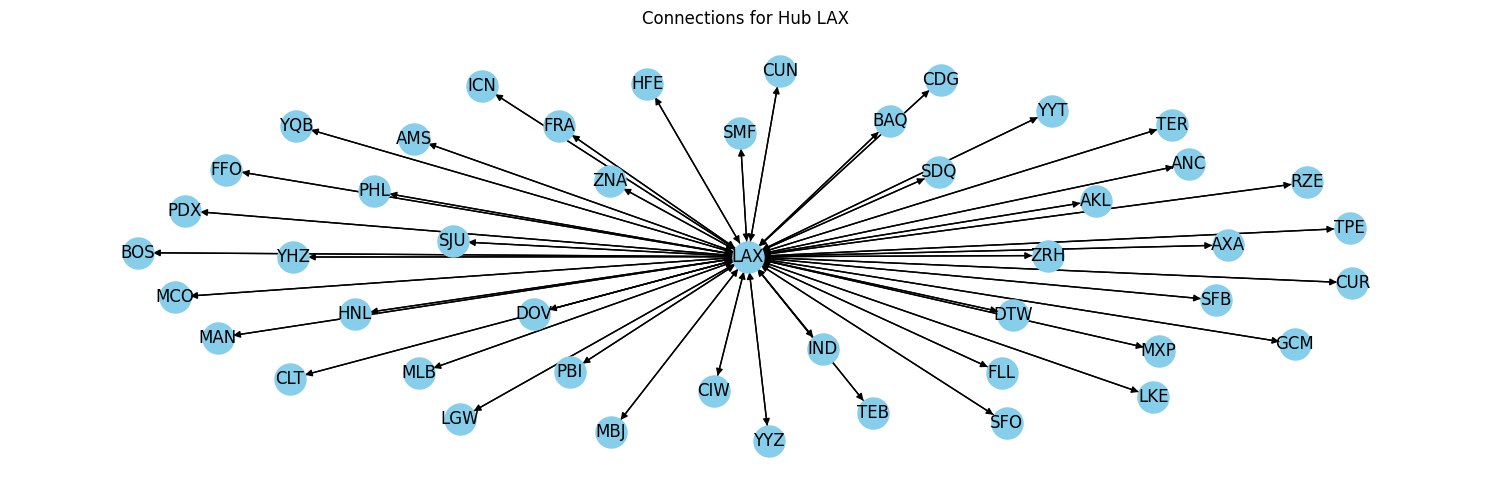

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a directed graph
G = nx.DiGraph()

# Create a dictionary to store edges for each hub
hub_edges = {h: [] for h in unique_hubs}

# Add nodes for airports and hubs
G.add_nodes_from(model3.airports, bipartite=0)
G.add_nodes_from(unique_hubs, bipartite=1)

# Add edges based on the model's decision variables
for i in model3.airports:
    for j in model3.airports:
        for h in unique_hubs:
            if model3.Z[i, j, h].value == 1:
                hub_edges[h].append((i, h))
                hub_edges[h].append((h, j))

# Plot each hub's connections separately
fig, axs = plt.subplots(1, len(unique_hubs), figsize=(15, 5))

for i, hub in enumerate(unique_hubs):
    G = nx.DiGraph()
    G.add_nodes_from(model3.airports, bipartite=0)
    G.add_nodes_from([hub], bipartite=1)
    G.add_edges_from(hub_edges[hub])

    ax = axs[i] if len(unique_hubs) > 1 else axs
    pos = nx.spring_layout(G)
    nx.draw(G, pos, ax=ax, with_labels=True, node_color='skyblue', node_size=500, arrows=True)
    ax.set_title(f'Connections for Hub {hub}')

plt.tight_layout()
plt.show()


In [ ]:
summary_data = []

# Iterate over the decision variables and collect data for the summary
for i in model3.airports:
    for j in model3.airports:
        for h in model3.potential_hubs:
            value_xijh = model3.X[i, j, h].value

            # If X[i, j, h] is greater than 0.0001, add the data to the summary
            if value_xijh > 0.0001:
                objective_value = value_xijh * model3.distances[i, j] * model3.passenger_counts[i, j]
                summary_data.append({'i': i, 'j': j, 'h': h, 'Objective': objective_value})

# Create a DataFrame from the summary data
summary_df = pd.DataFrame(summary_data)

# Sort the DataFrame by the 'Objective' column in descending order
summary_df = summary_df.sort_values(by='Objective', ascending=False)

# Calculate the number of rows representing the top 10% of results
top_10_percent = int(len(summary_df) * 0.1)

# Select only the top 10% of rows
top_10_percent_df = summary_df.head(top_10_percent)

print(top_10_percent_df)

       i    j    h     Objective
11   DTW  AMS  LAX  2.932232e+10
22   SFO  TPE  LAX  2.787071e+10
9    DTW  ICN  LAX  2.680244e+10
17   SFO  FRA  LAX  2.178762e+10
53   MCO  LGW  LAX  2.027726e+10
13   SFO  CDG  LAX  1.902979e+10
18   SFO  ICN  LAX  1.806970e+10
139  HNL  ICN  LAX  1.802757e+10
14   SFO  ZRH  LAX  1.529955e+10
49   MCO  FRA  LAX  1.512171e+10
52   MCO  AMS  LAX  1.339417e+10
21   SFO  AKL  LAX  1.320531e+10
19   SFO  AMS  LAX  1.227072e+10
89   BOS  ICN  LAX  1.177303e+10
133  PDX  AMS  LAX  1.034014e+10


In [ ]:
# Check the constrants in order to check infeasiability of model
# Check violated constraints
violated_constraints = []

# 1. Route-Hub Dependency constraint
for i in model3.airports:
    for j in model3.airports:
        for h in model3.potential_hubs:
            if model3.Z[i, j, h].value is not None and model3.Y[h].value is not None:
                if model3.Z[i, j, h].value > model3.Y[h].value:
                    violated_constraints.append(('Route_Hub_Dependency', (i, j, h)))

# 2. Hub Selection Limit constraint
if sum(model3.Y[h].value for h in model3.potential_hubs) > 1:
    violated_constraints.append(('Hub_Selection_Limit', None))

# 3. Route Utilization constraint
for i in model3.airports:
    for j in model3.airports:
        if i != j:
            if sum(model3.Z[i, j, h].value for h in model3.potential_hubs) < 1:
                violated_constraints.append(('Route_Utilization', (i, j)))

# 4. Capacity constraint for each potential hub
for h in model3.potential_hubs:
    if sum(model3.X[i, j, h].value * model3.distances[i, j] for i in model3.airports for j in model3.airports if i != j) > model3.hub_capacities[h]:
        violated_constraints.append(('Capacity_Constraint', h))

# 5. Demand Fulfillment constraint
for i in model3.airports:
    for j in model3.airports:
        if i != j:
            if sum(model3.X[i, j, h].value for h in model3.potential_hubs) - model3.demand[i, j].value >= 1:
                violated_constraints.append(('Demand_Fulfillment', (i, j)))

# 6. Not same airport constraint
for i in model3.airports:
    for j in model3.airports:
        for h in model3.potential_hubs:
            if i == j and model3.X[i, j, h].value > 0:
                violated_constraints.append(('Not_Same_Airport', (i, j, h)))

# 7. Connection constraint between X and Z
for i in model3.airports:
    for j in model3.airports:
        for h in model3.potential_hubs:
            if model3.X[i, j, h].value is not None and model3.Z[i, j, h].value is not None:
                if model3.X[i, j, h].value > model3.demand[i, j].value * model3.Z[i, j, h].value:
                    violated_constraints.append(('Connection_Constraint', (i, j, h)))

# 8. International Greater Than Domestic constraint
for h in model3.potential_hubs:
    domestic_flights = sum(1 for i, row in sampled_airports[sampled_airports['usg_apt'] == h].iterrows() if row['carriergroup'] == 1)
    international_flights = sum(1 for i, row in sampled_airports[sampled_airports['usg_apt'] == h].iterrows() if row['carriergroup'] == 0)
    if domestic_flights > 0 and international_flights > 0:
        if international_flights < domestic_flights:
            violated_constraints.append(('International_Greater_Than_Domestic_Constraint', h))


# Print violated constraints
if violated_constraints:
    print("Violated Constraints:")
    for constraint_name, key in violated_constraints:
        print(f"Constraint {constraint_name} is violated for key {key}.")
else:
    print("No violated constraints.")

No violated constraints.
